In [92]:
# Au début du notebook
import time
start_time = time.time()

<h1 style="text-align:center;color:blue;font-size:30px;font-family:times">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE)</h1><br>


<h1 style="text-align:center;color:yellow;font-size:50px;font-family:ALGERIAN;border:solid">Projet de Machine Learning</h1>

<h1 style="text-align:center;color:brown;font-size:50px;font-family:ALGERIAN;border:solid">House prices prediction</h1>

<div style="display:flex;text-align:justify">
    
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:60%">
<span style="font-weight:bold">Réalisé par </span>
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle">
        <li>Traoré sié rachid</li>                         
        <li>Adoumbaye MADJYAM</li>
        <li>Sadibou Ngom</li>                          
        <li>Sarr Mana El Hadj </li>
    </ul>
    <span style="font-style: italic;font-size:13px">Élèves Ingénieurs Statisticiens Economistes</span>
</ul>

<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%">
 <li style="font-weight:bold">Sous la supervision de:</li>
 <li>Mme Mously Diaw</li>
    <span style="font-style: italic;font-size:13px">Senior Machine learning Engineer, Entrepreneure @Sen-IA
    </span>
   
</ul>
    
</div>   


# SOMMAIRE

Nous utiliserons l'ensemble de données [Ames Housing](http://jse.amstat.org/v19n3/decock.pdf) qui a été compilé pour la première fois par Dean De Cock. Il s'agit d'un ensemble de 1 460 maisons résidentielles à Ames, dans l'Iowa, chacune décrite par 80 caractéristiques. Nous l'utiliserons pour prédire le prix final des maisons. Dans cet exemple, nous n'utiliserons que les **n** caractéristiques les plus intéressantes.



## I-  EDA: Exploratory Data Analysis





## Importation des library

In [93]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn import set_config
from scipy.stats.mstats import winsorize
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             max_error,
                            )
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder

set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Importation des données

In [94]:
data= pd.read_csv("../data/train.csv", sep=";")
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [95]:
data = data.drop('Id', axis=1)

data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,

### Descripion Globale

In [96]:
# dimension
data.shape

(1460, 80)

Nous avons un jeu de données composé de 1460 individus (les maisons) et 81 variables relatives aux  caractéristiques des maisons etc...

In [97]:
# dictionnaire des variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Data summary

In [98]:
# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = data.select_dtypes(include=['number'])

# Calculer les statistiques descriptives pour les colonnes numériques
colonnes_numeriques.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [99]:
# Sélectionner les colonnes qualitatives
colonnes_qualitatives = data.select_dtypes(include=['object'])
# Obtenir les statistiques descriptives des variables qualitatives
colonnes_qualitatives.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


### Extraction des données

In [100]:
data= data.copy()

In [101]:
missing_percentage_x = (data['SalePrice'].isnull().sum() / len(data)) * 100
print(f"Le pourcentage de valeurs manquantes pour la variable cible est : {missing_percentage_x:.2f}%")


Le pourcentage de valeurs manquantes pour la variable cible est : 0.00%


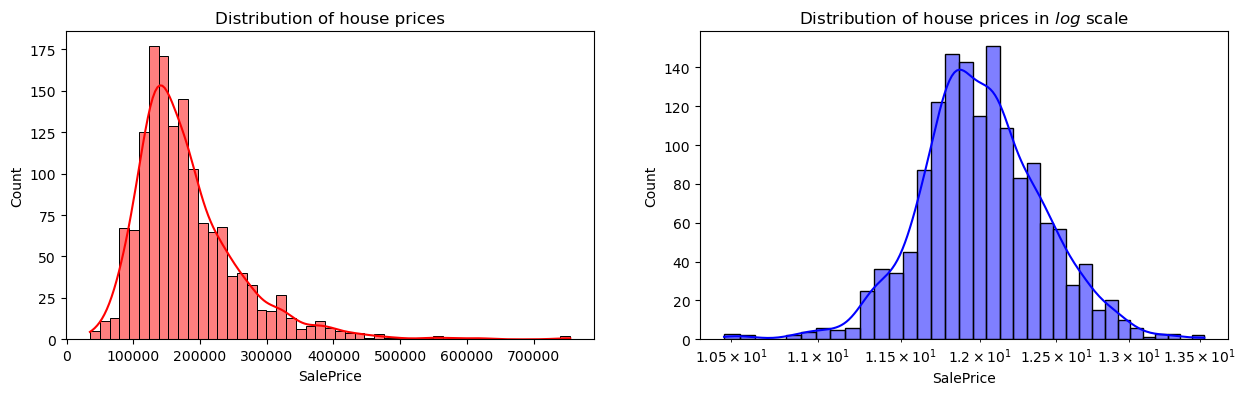

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
y=data.SalePrice
sns.histplot(y, color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution of house prices')

log_y = np.log(y)
sns.histplot(log_y, color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution of house prices in $log$ scale')
axes[1].set_xscale('log');

Si nous regardons le graphique de gauche, le prix de vente de la maison varie de 34900 à 755000, le graphique est asymétrique à gauche. Pour la suite de l'analyse, nous appliquerons le logarithme à la variable cible « charges ». La normalité est une hypothèse importante pour de nombreuses techniques statistiques.

- `log` est une transformation particulière de Box-Cox
- (transformation de Box-Cox)(https://www.statisticshowto.com/box-cox-transformation/) : Une transformation de Box-Cox est un moyen de transformer des variables non normales en une forme normale.


## STATISTIQUES DESCRIPTIVES

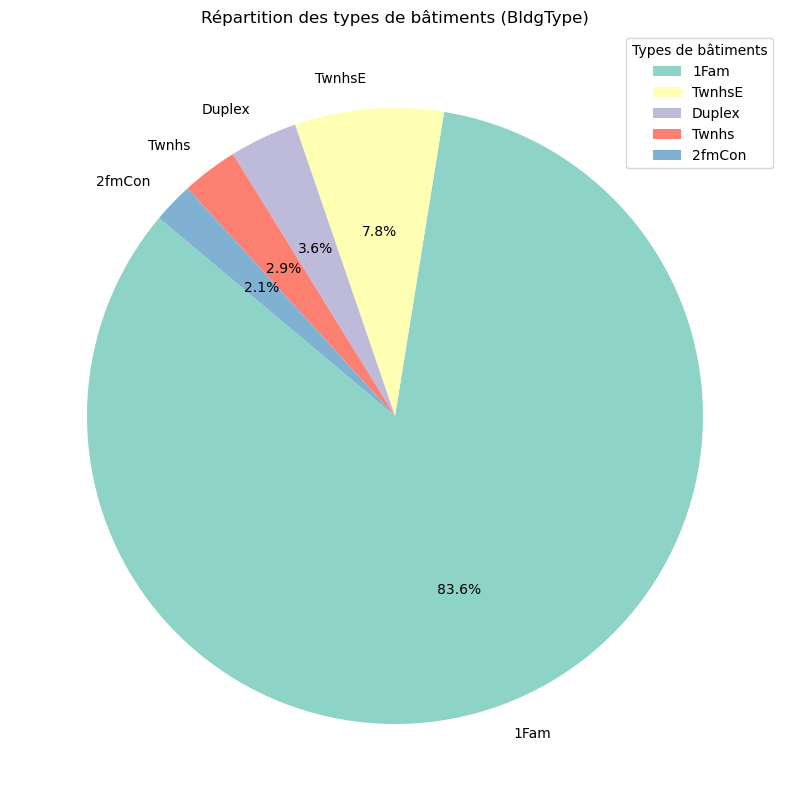

In [103]:


# Calculer la répartition des types de bâtiments
building_counts = data['BldgType'].value_counts()

# Créer le diagramme en secteurs
plt.figure(figsize=(20,10))
plt.pie(building_counts, labels=building_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

# Ajouter le titre
plt.title('Répartition des types de bâtiments (BldgType)')

# Ajouter la légende
plt.legend(building_counts.index, title='Types de bâtiments', loc='best')

# Afficher le graphique
plt.show()



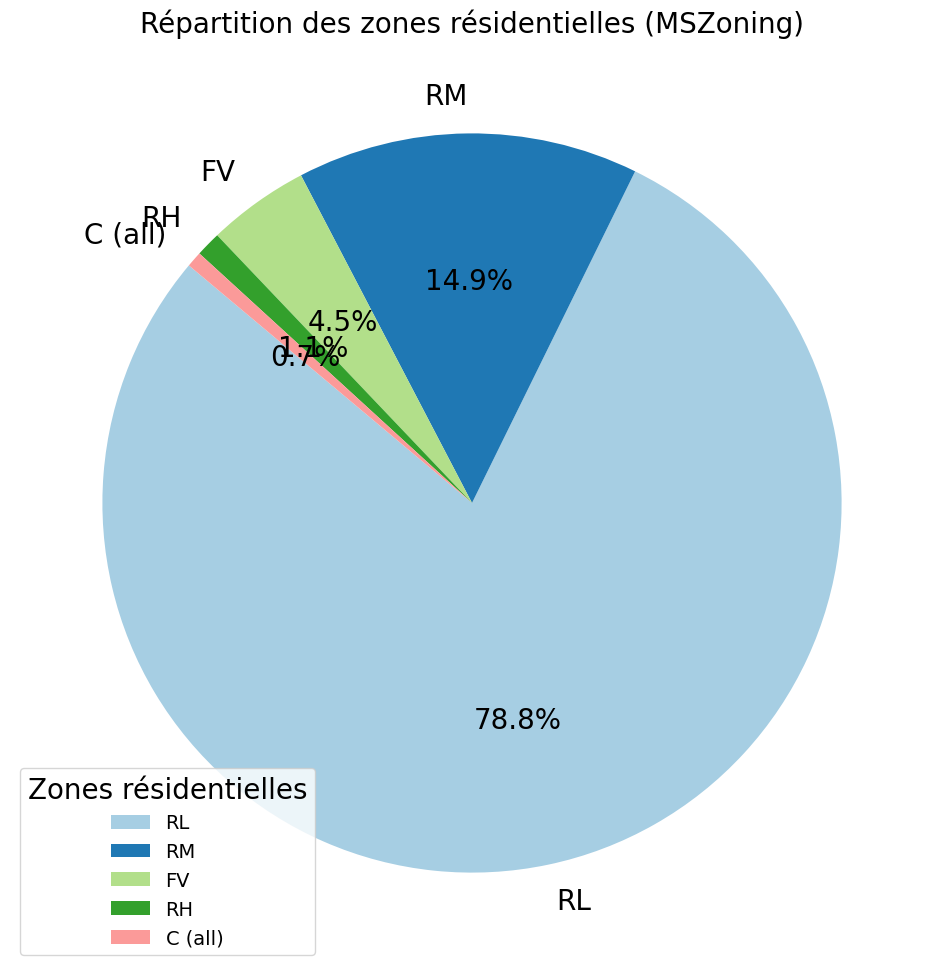

In [104]:
# Calculer la répartition des zones résidentielles
zone_counts = data['MSZoning'].value_counts()

# Créer le diagramme en secteurs
plt.figure(figsize=(20, 12))
plt.pie(zone_counts,
        labels=zone_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors,
        textprops={'fontsize': 20})  # Taille de la police pour les étiquettes

# Ajouter le titre
plt.title('Répartition des zones résidentielles (MSZoning)', fontsize=20)  # Taille du titre

# Ajouter la légende
plt.legend(zone_counts.index, title='Zones résidentielles', loc='best', fontsize=14, title_fontsize=20)  # Taille des textes et titre de la légende

# Afficher le graphique
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_11488\436009491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Neighborhood'],


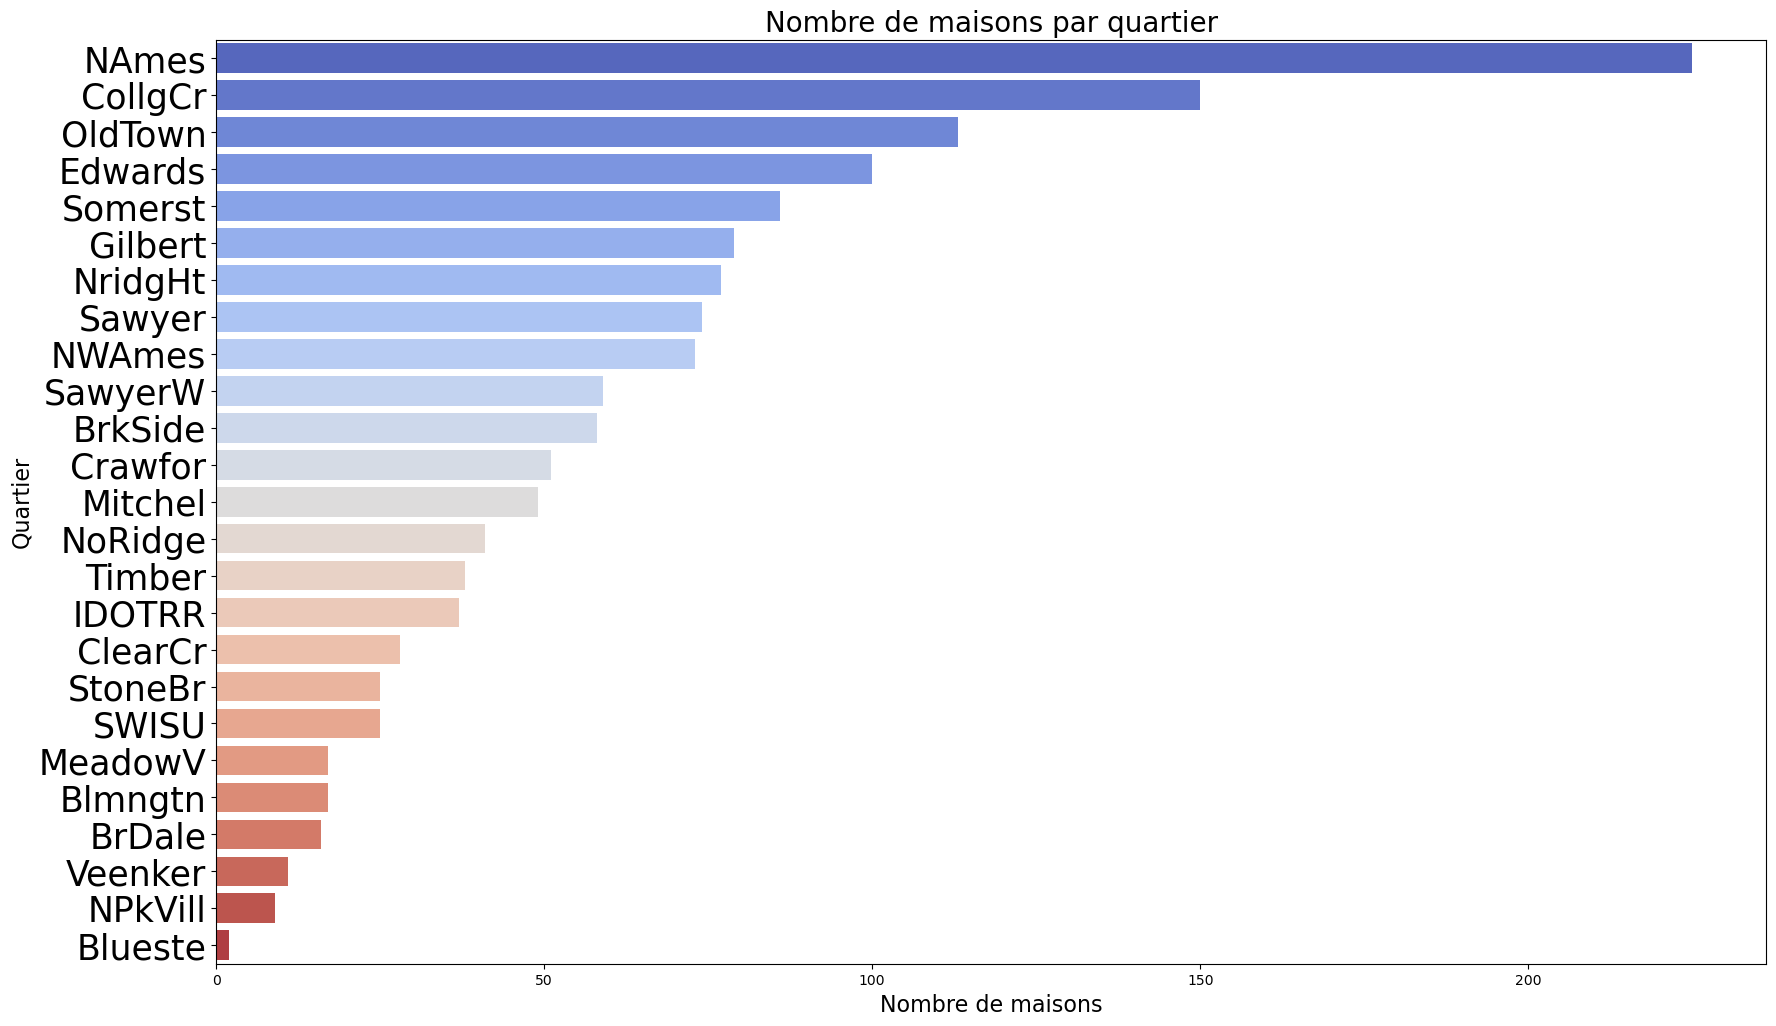

In [105]:
plt.figure(figsize=(20, 12))
sns.countplot(y=data['Neighborhood'],
              order=data['Neighborhood'].value_counts().index,
              palette='coolwarm')
plt.title('Nombre de maisons par quartier', fontsize=20)
plt.xlabel('Nombre de maisons', fontsize=16)
plt.ylabel('Quartier', fontsize=16)
plt.yticks(fontsize=25)
plt.show()


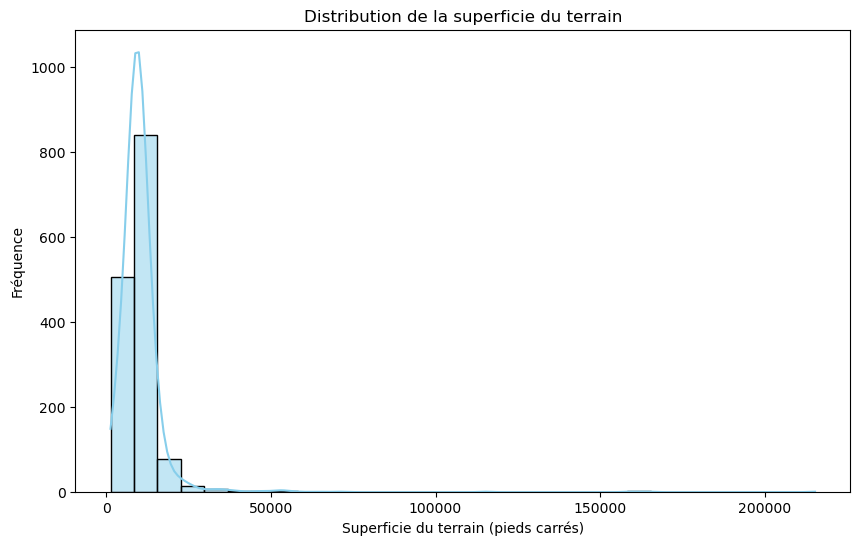

In [106]:


plt.figure(figsize=(10, 6))
sns.histplot(data['LotArea'], bins=30, kde=True, color='skyblue')
plt.title('Distribution de la superficie du terrain')
plt.xlabel('Superficie du terrain (pieds carrés)')
plt.ylabel('Fréquence')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_11488\953214144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Neighborhood'], y=data['SalePrice'], palette="coolwarm")  # Ajouter une palette de couleurs


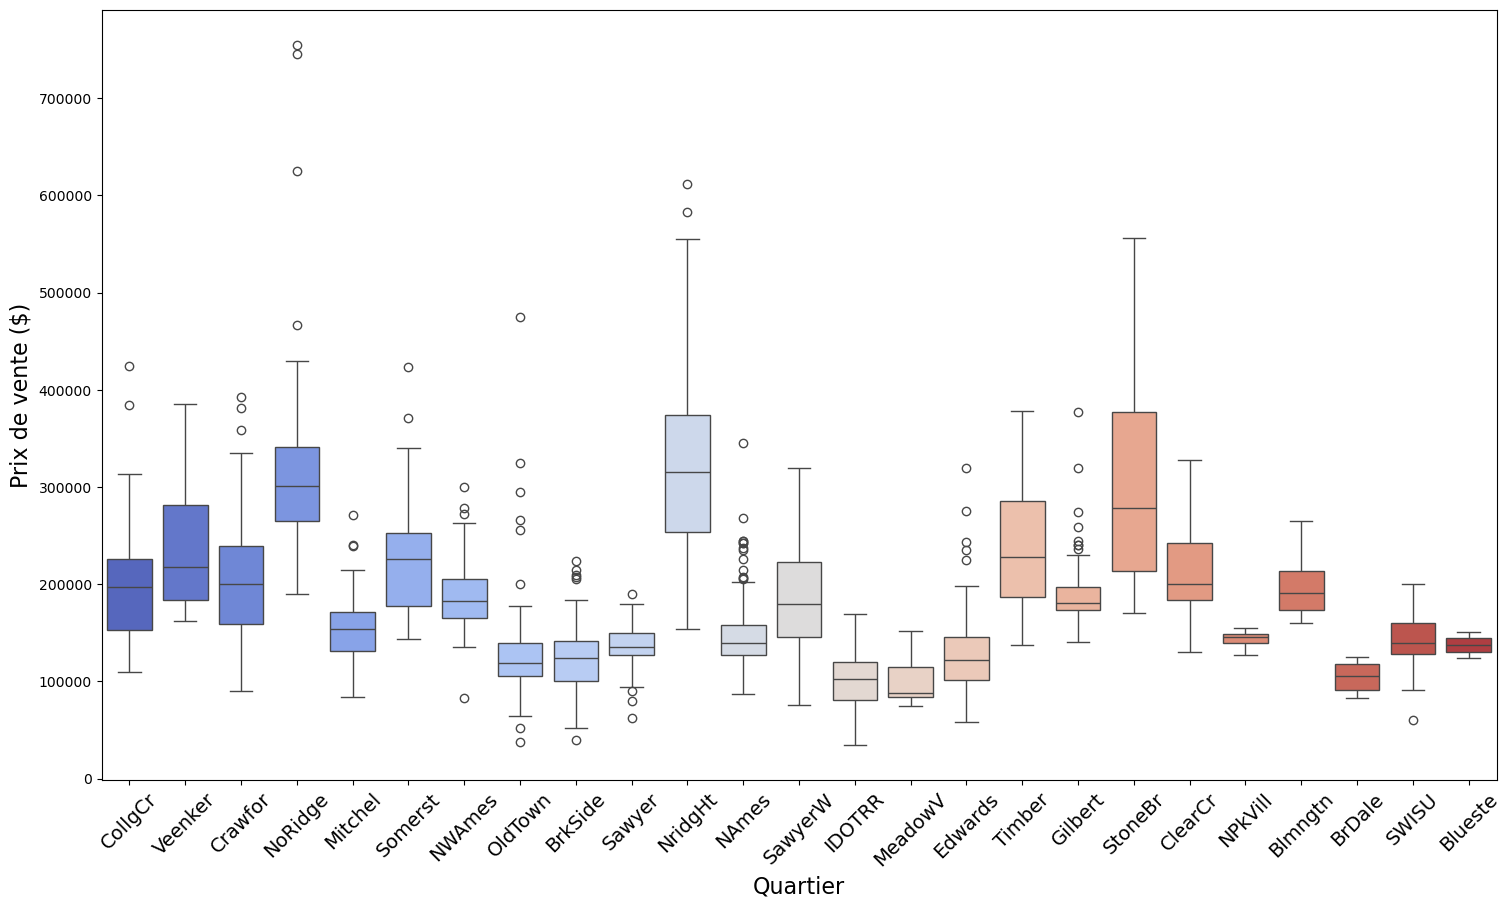

In [107]:
plt.figure(figsize=(18, 10))  # Augmenter la taille du graphique
sns.boxplot(x=data['Neighborhood'], y=data['SalePrice'], palette="coolwarm")  # Ajouter une palette de couleurs

# Ajouter un titre et des labels avec une taille plus grande
#plt.title('Quartier vs Prix de vente', fontsize=20)
plt.xlabel('Quartier', fontsize=16)
plt.ylabel('Prix de vente ($)', fontsize=16)

# Rotation et taille des étiquettes des quartiers
plt.xticks(rotation=45, fontsize=14)

plt.show()


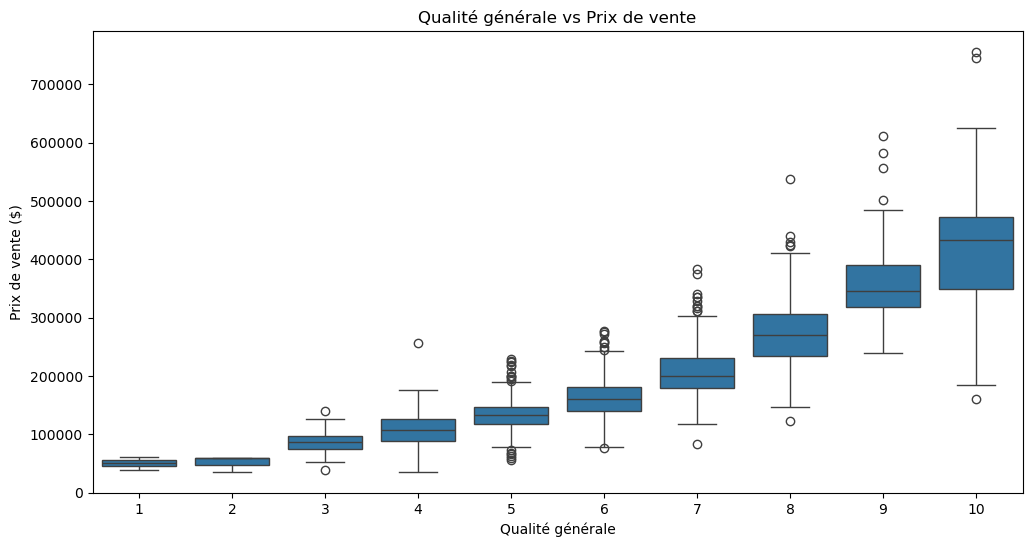

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['OverallQual'], y=data['SalePrice'])
plt.title('Qualité générale vs Prix de vente')
plt.xlabel('Qualité générale')
plt.ylabel('Prix de vente ($)')
plt.show()


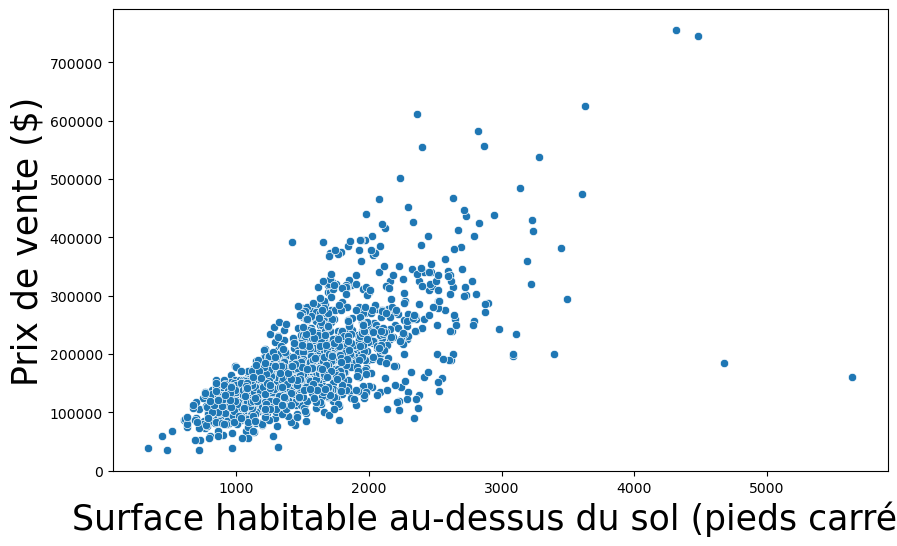

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
#plt.title('Relation entre la surface habitable et le prix de vente', fontsize=12)
plt.xlabel('Surface habitable au-dessus du sol (pieds carrés)', fontsize=25)
plt.ylabel('Prix de vente ($)', fontsize=25)
plt.show()


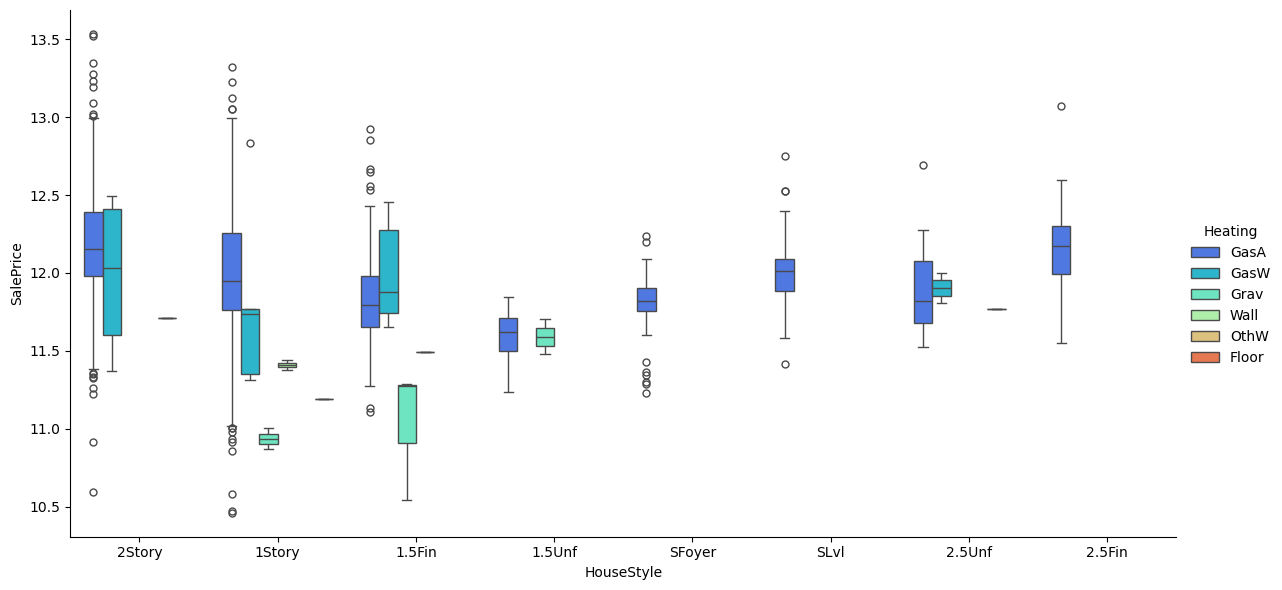

In [110]:
sns.catplot(kind="box", x='HouseStyle', y=log_y, hue='Heating',
            data=data, palette='rainbow', height=6, aspect=2);

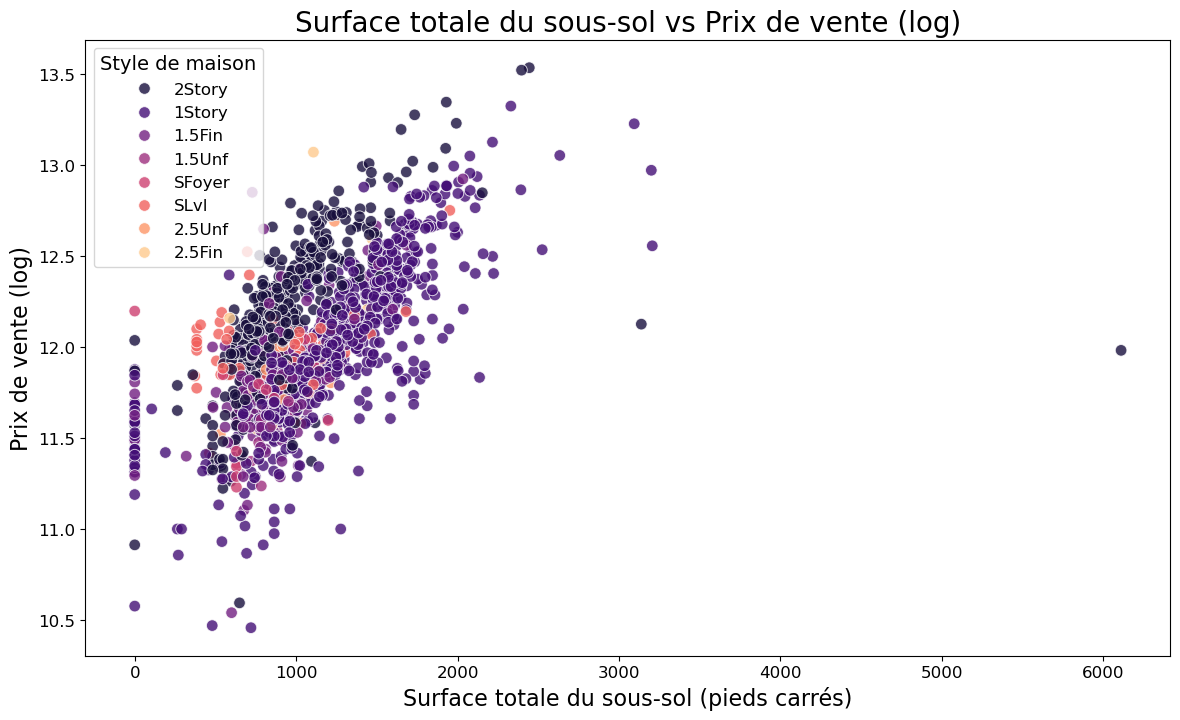

In [111]:
#graphique de dispersion où l'axe X représente la superficie du sous-sol (TotalBsmtSF), l'axe Y représente la variable log_y
#(une transformation logaritmique de votre variable cible),
#et chaque point est coloré selon le style de la maison (HouseStyle).
plt.figure(figsize=(14, 8))  # Augmenter la taille du graphique

# Créer le scatterplot avec des ajustements
sns.scatterplot(x='TotalBsmtSF',
                y=log_y,
                data=data,
                hue='HouseStyle',
                palette='magma',
                s=70,  # Taille des points
                alpha=0.8)  # Transparence des points

# Ajouter un titre et des labels avec une taille augmentée
plt.title('Surface totale du sous-sol vs Prix de vente (log)', fontsize=20)
plt.xlabel('Surface totale du sous-sol (pieds carrés)', fontsize=16)
plt.ylabel('Prix de vente (log)', fontsize=16)

# Agrandir les étiquettes des axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajouter une légende claire
plt.legend(title='Style de maison', fontsize=12, title_fontsize=14, loc='upper left')

plt.show()


### VARIABLES PERTINENTES


In [112]:

# Liste des colonnes souhaitées
variables_pertinentes = [
    'SalePrice','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
    'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
    'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
]

# Sélection des colonnes souhaitées
data = data[variables_pertinentes]

# Affichage des premières lignes du data
data.head(5)


,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,208500,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1
1,181500,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0
2,223500,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1
3,140000,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0
4,250000,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1


<Axes: >

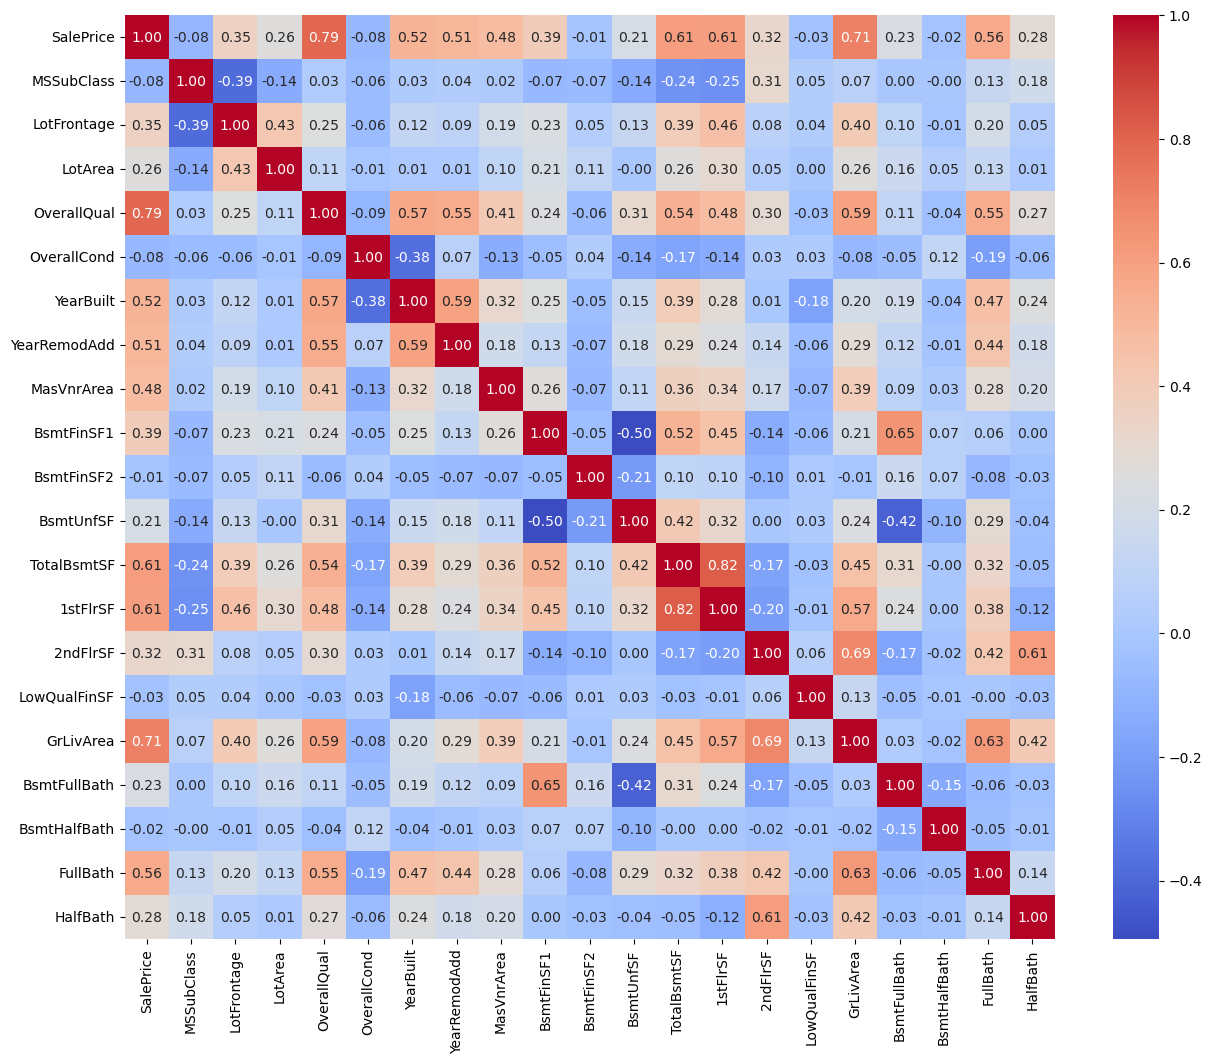

In [113]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

### Valeur manquantes

In [114]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Identifier les colonnes avec plus de 50% de valeurs manquantes
colonnes_a_supprimer = missing_percentage[missing_percentage > 40].index

# Supprimer ces colonnes du DataFrame
data = data.drop(columns=colonnes_a_supprimer)

data



,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,208500,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1
1,181500,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0
2,223500,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1
3,140000,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0
4,250000,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1
1456,210000,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0
1457,266500,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0
1458,142125,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0


<Axes: >

<Figure size 2000x1000 with 0 Axes>

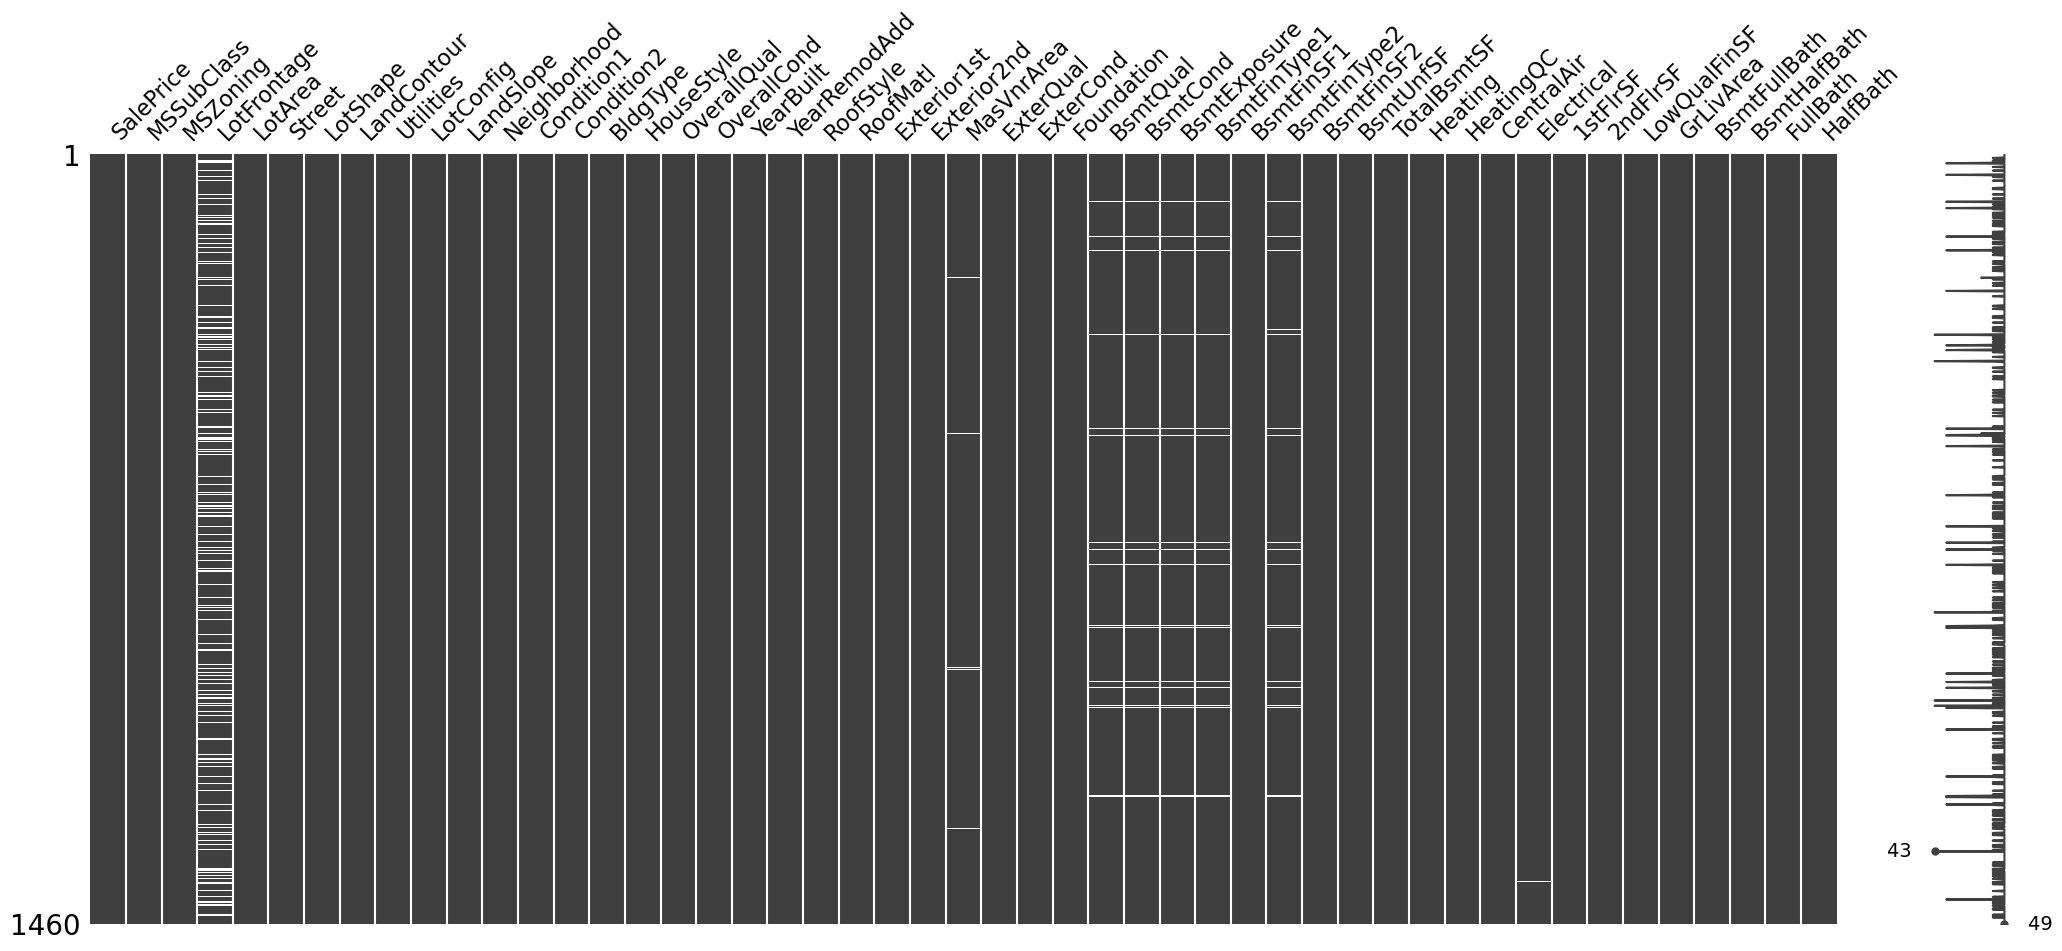

In [115]:
# Configuration de la taille de la figure
plt.figure(figsize=(20, 10))
# Visualtisation des NAs
msno.matrix(data)

<Axes: >

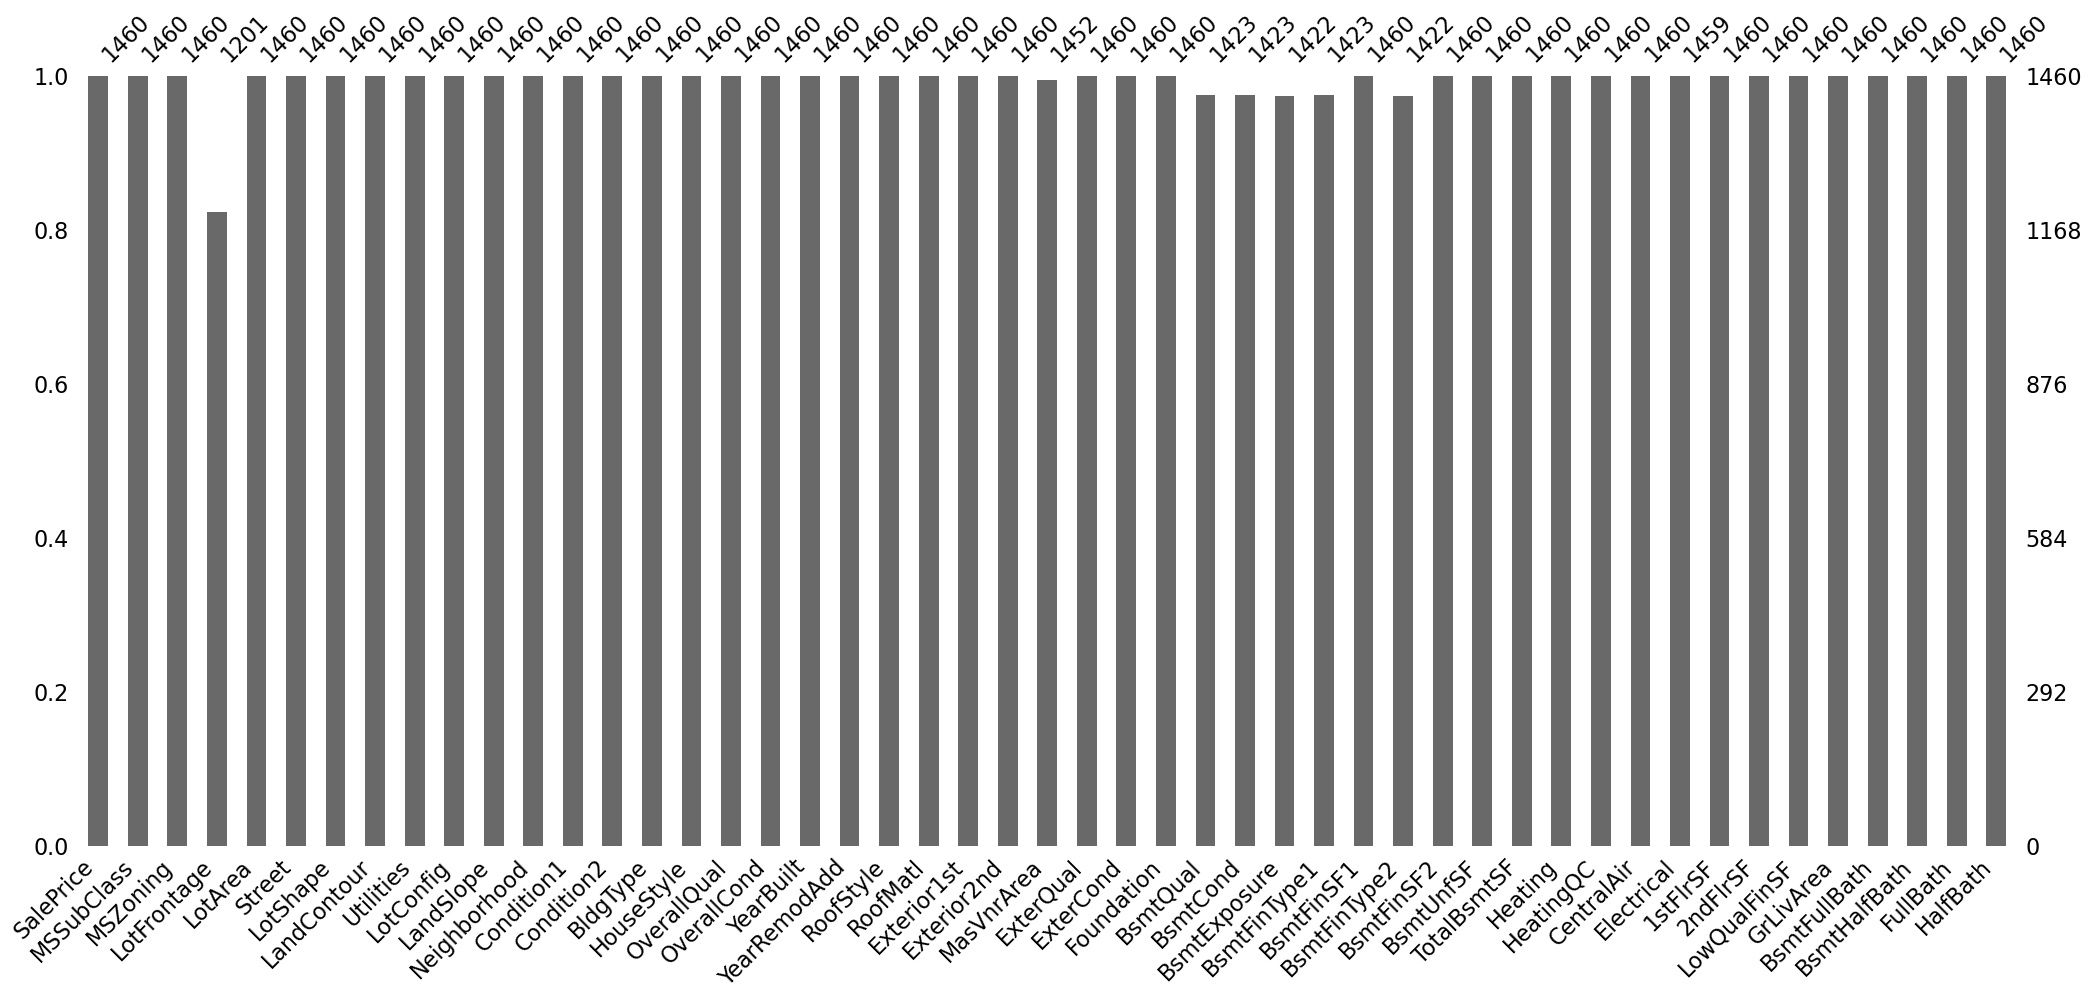

In [116]:
msno.bar(data)

In [117]:
# nombre de valeurs manquantes sur les variables retenues
data.isna().sum().sort_values(ascending=False)

LotFrontage     259
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
TotalBsmtSF       0
Foundation        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
HeatingQC         0
Heating           0
ExterQual         0
CentralAir        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
ExterCond         0
SalePrice         0
MSSubClass        0
Condition1        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition2        0
Exterior2nd       0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
HalfBath          0
dtype: int64

### Recapitulatif

In [118]:

# Generate a profile report from a Dataset stored as a pandas `DataFrame`.
#profile = ProfileReport(data, title="Profiling Report")
#profile.to_notebook_iframe()
#profile.to_file("../ressource/data_report.html")  # Write the report to a file.


# II- Apurement et  Feature Engineering

Dans cette section, nous commencerons par apurer la base de données retenue, en traitant notamment les valeurs manquantes, les outliers, et en vérifiant la présence de doublons.

Ensuite, nous passerons au prétraitement des variables en vue de la modélisation. Cela inclut le recodage des variables, la création de nouvelles variables pertinentes, ainsi que la sélection des variables explicatives.

### Traitement des valeurs aberrantes et outliers

Ce script décrit une méthode systématique pour traiter les données manquantes dans une base de données en fonction de la nature des colonnes (quantitatives ou qualitatives). Voici les étapes principales :  

1. **Identification des colonnes** :  
   - Les colonnes quantitatives (numériques) sont identifiées en sélectionnant celles qui contiennent des données de type numérique.  
   - Les colonnes qualitatives (catégoriques) sont identifiées en sélectionnant celles contenant des données de type texte ou catégorielles.

2. **Imputation des valeurs manquantes pour les colonnes quantitatives** :  
   - Un imputeur est créé avec une stratégie basée sur la médiane, qui remplace les valeurs manquantes par la médiane de chaque colonne.
   - Cette méthode est appliquée aux colonnes quantitatives pour assurer que les données soient cohérentes et sans valeurs manquantes.

3. **Imputation des valeurs manquantes pour les colonnes qualitatives** :  
   - Un imputeur est créé avec une stratégie basée sur la modalité (valeur la plus fréquente), permettant de remplacer les valeurs manquantes par la catégorie la plus courante dans chaque colonne.
   - Cette approche est appliquée aux colonnes qualitatives pour garantir une cohérence dans les catégories.

4. **Vérification des données** :  
   - Une vérification finale est effectuée pour s'assurer que toutes les valeurs manquantes ont été traitées.  

Ce processus garantit une base de données complète et cohérente, essentielle pour des analyses ou des modélisations ultérieures.

In [119]:
# Identification des colonnes quantitatives (numériques)
colonnes_quantitatives = data.select_dtypes(include=['number']).columns

# Identification des colonnes qualitatives (catégorielles)
colonnes_qualitatives = data.select_dtypes(include=['object']).columns

# Création de l'imputeur pour les variables quantitatives (médiane)
imputer_quant = SimpleImputer(strategy='median')

# Application de l'imputeur sur les colonnes quantitatives
data[colonnes_quantitatives] = imputer_quant.fit_transform(data[colonnes_quantitatives])

# Création de l'imputeur pour les variables qualitatives (mode)
imputer_qual = SimpleImputer(strategy='most_frequent')

# Application de l'imputeur sur les colonnes qualitatives
data[colonnes_qualitatives] = imputer_qual.fit_transform(data[colonnes_qualitatives])

# Vérification des valeurs manquantes restantes
print(data.isnull().sum())

SalePrice       0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64


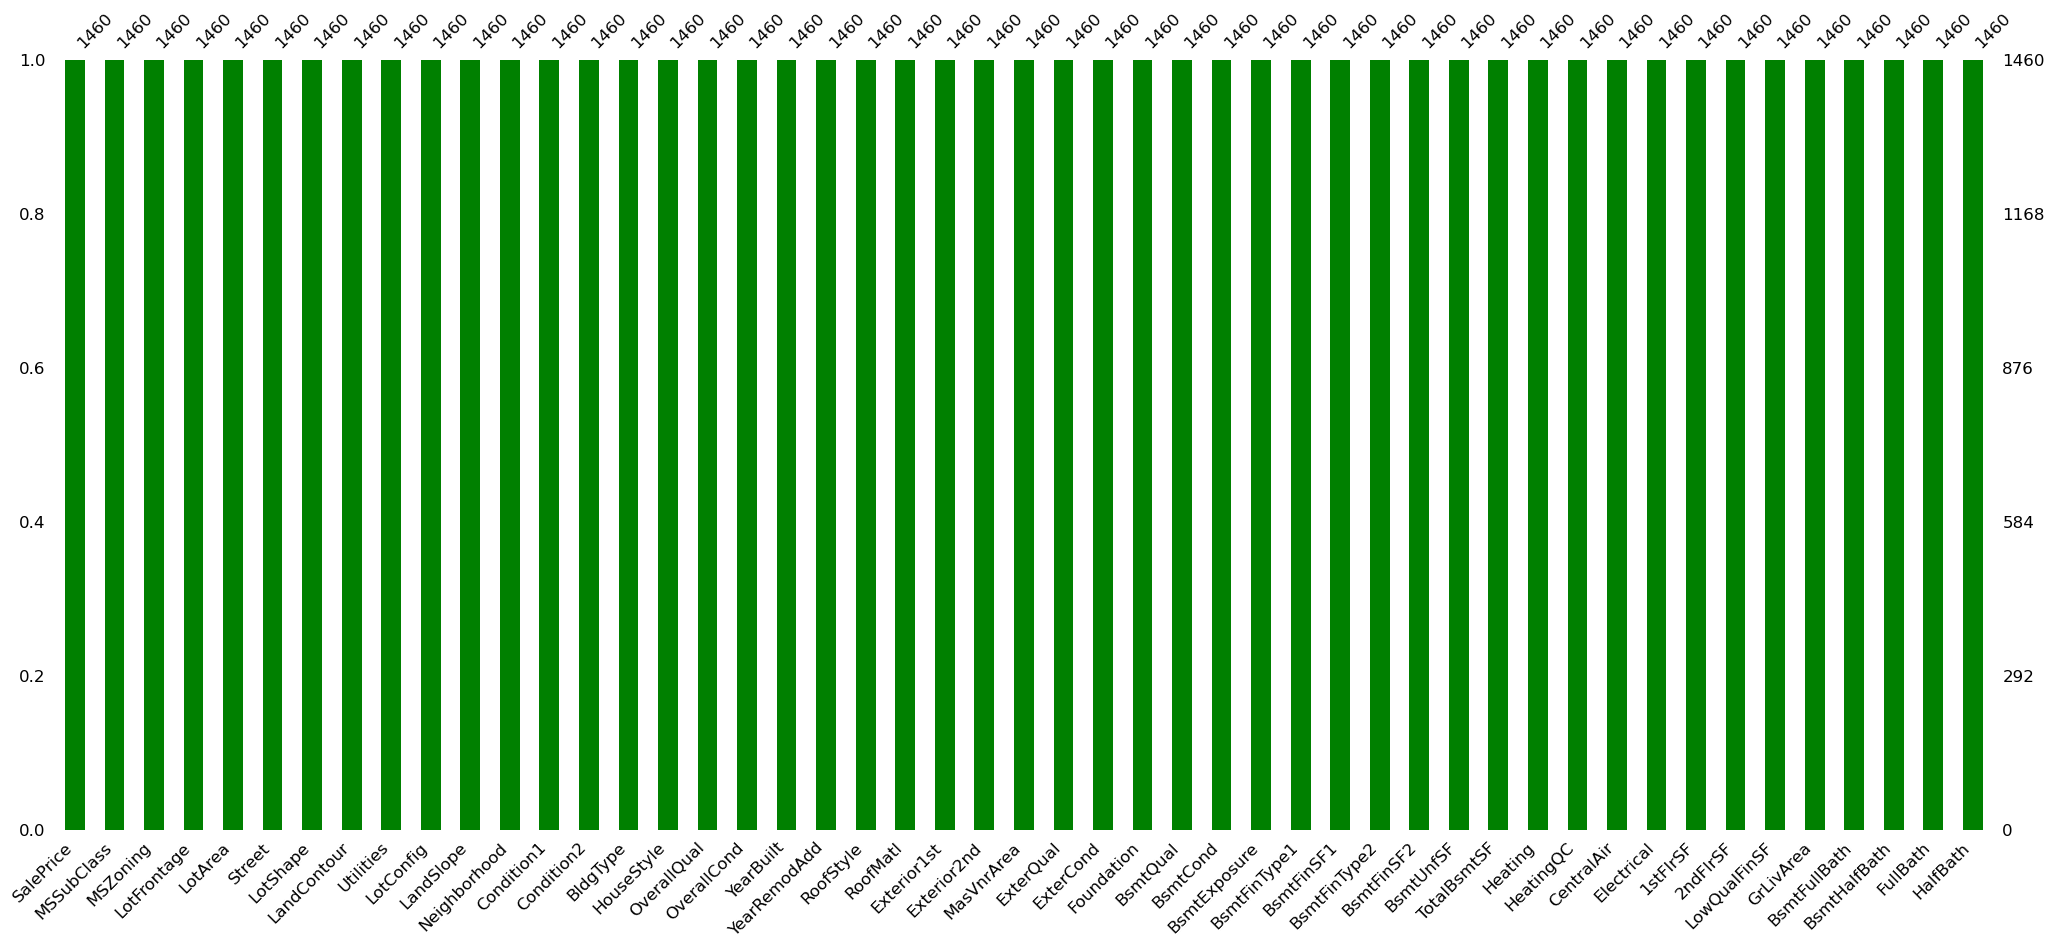

In [120]:
# Configuration de la taille de la figure
plt.figure(figsize=(20, 10))
# Génération du graphique des valeurs manquantes avec des barres bleues
msno.bar(data, color='green', fontsize=12)

# Affichage du graphique
plt.show()

#### TRAITEMENT DES OUTLIERS

Une valeur aberrante, ou *outlier* en statistiques, désigne une observation qui s'écarte de manière notable des autres données d'un ensemble. Dans la suite, nous détaillerons la méthode utilisée pour leur identification et leur traitement.

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   MSSubClass    1460 non-null   float64
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1460 non-null   float64
 4   LotArea       1460 non-null   float64
 5   Street        1460 non-null   object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
 15  HouseStyle    1460 non-null   object 
 16  OverallQual   1460 non-null   float64
 17  OverallCond   1460 non-null   float64
 18  YearBuilt     1460 non-null 

La procédure suivante vise à analyser visuellement la distribution des variables numériques dans un jeu de données, notamment en identifiant les valeurs aberrantes à l'aide de boxplots. Elle est particulièrement utile lorsque la variable cible est le prix des maisons, car elle permet de repérer les facteurs explicatifs potentiellement problématiques ou influents.

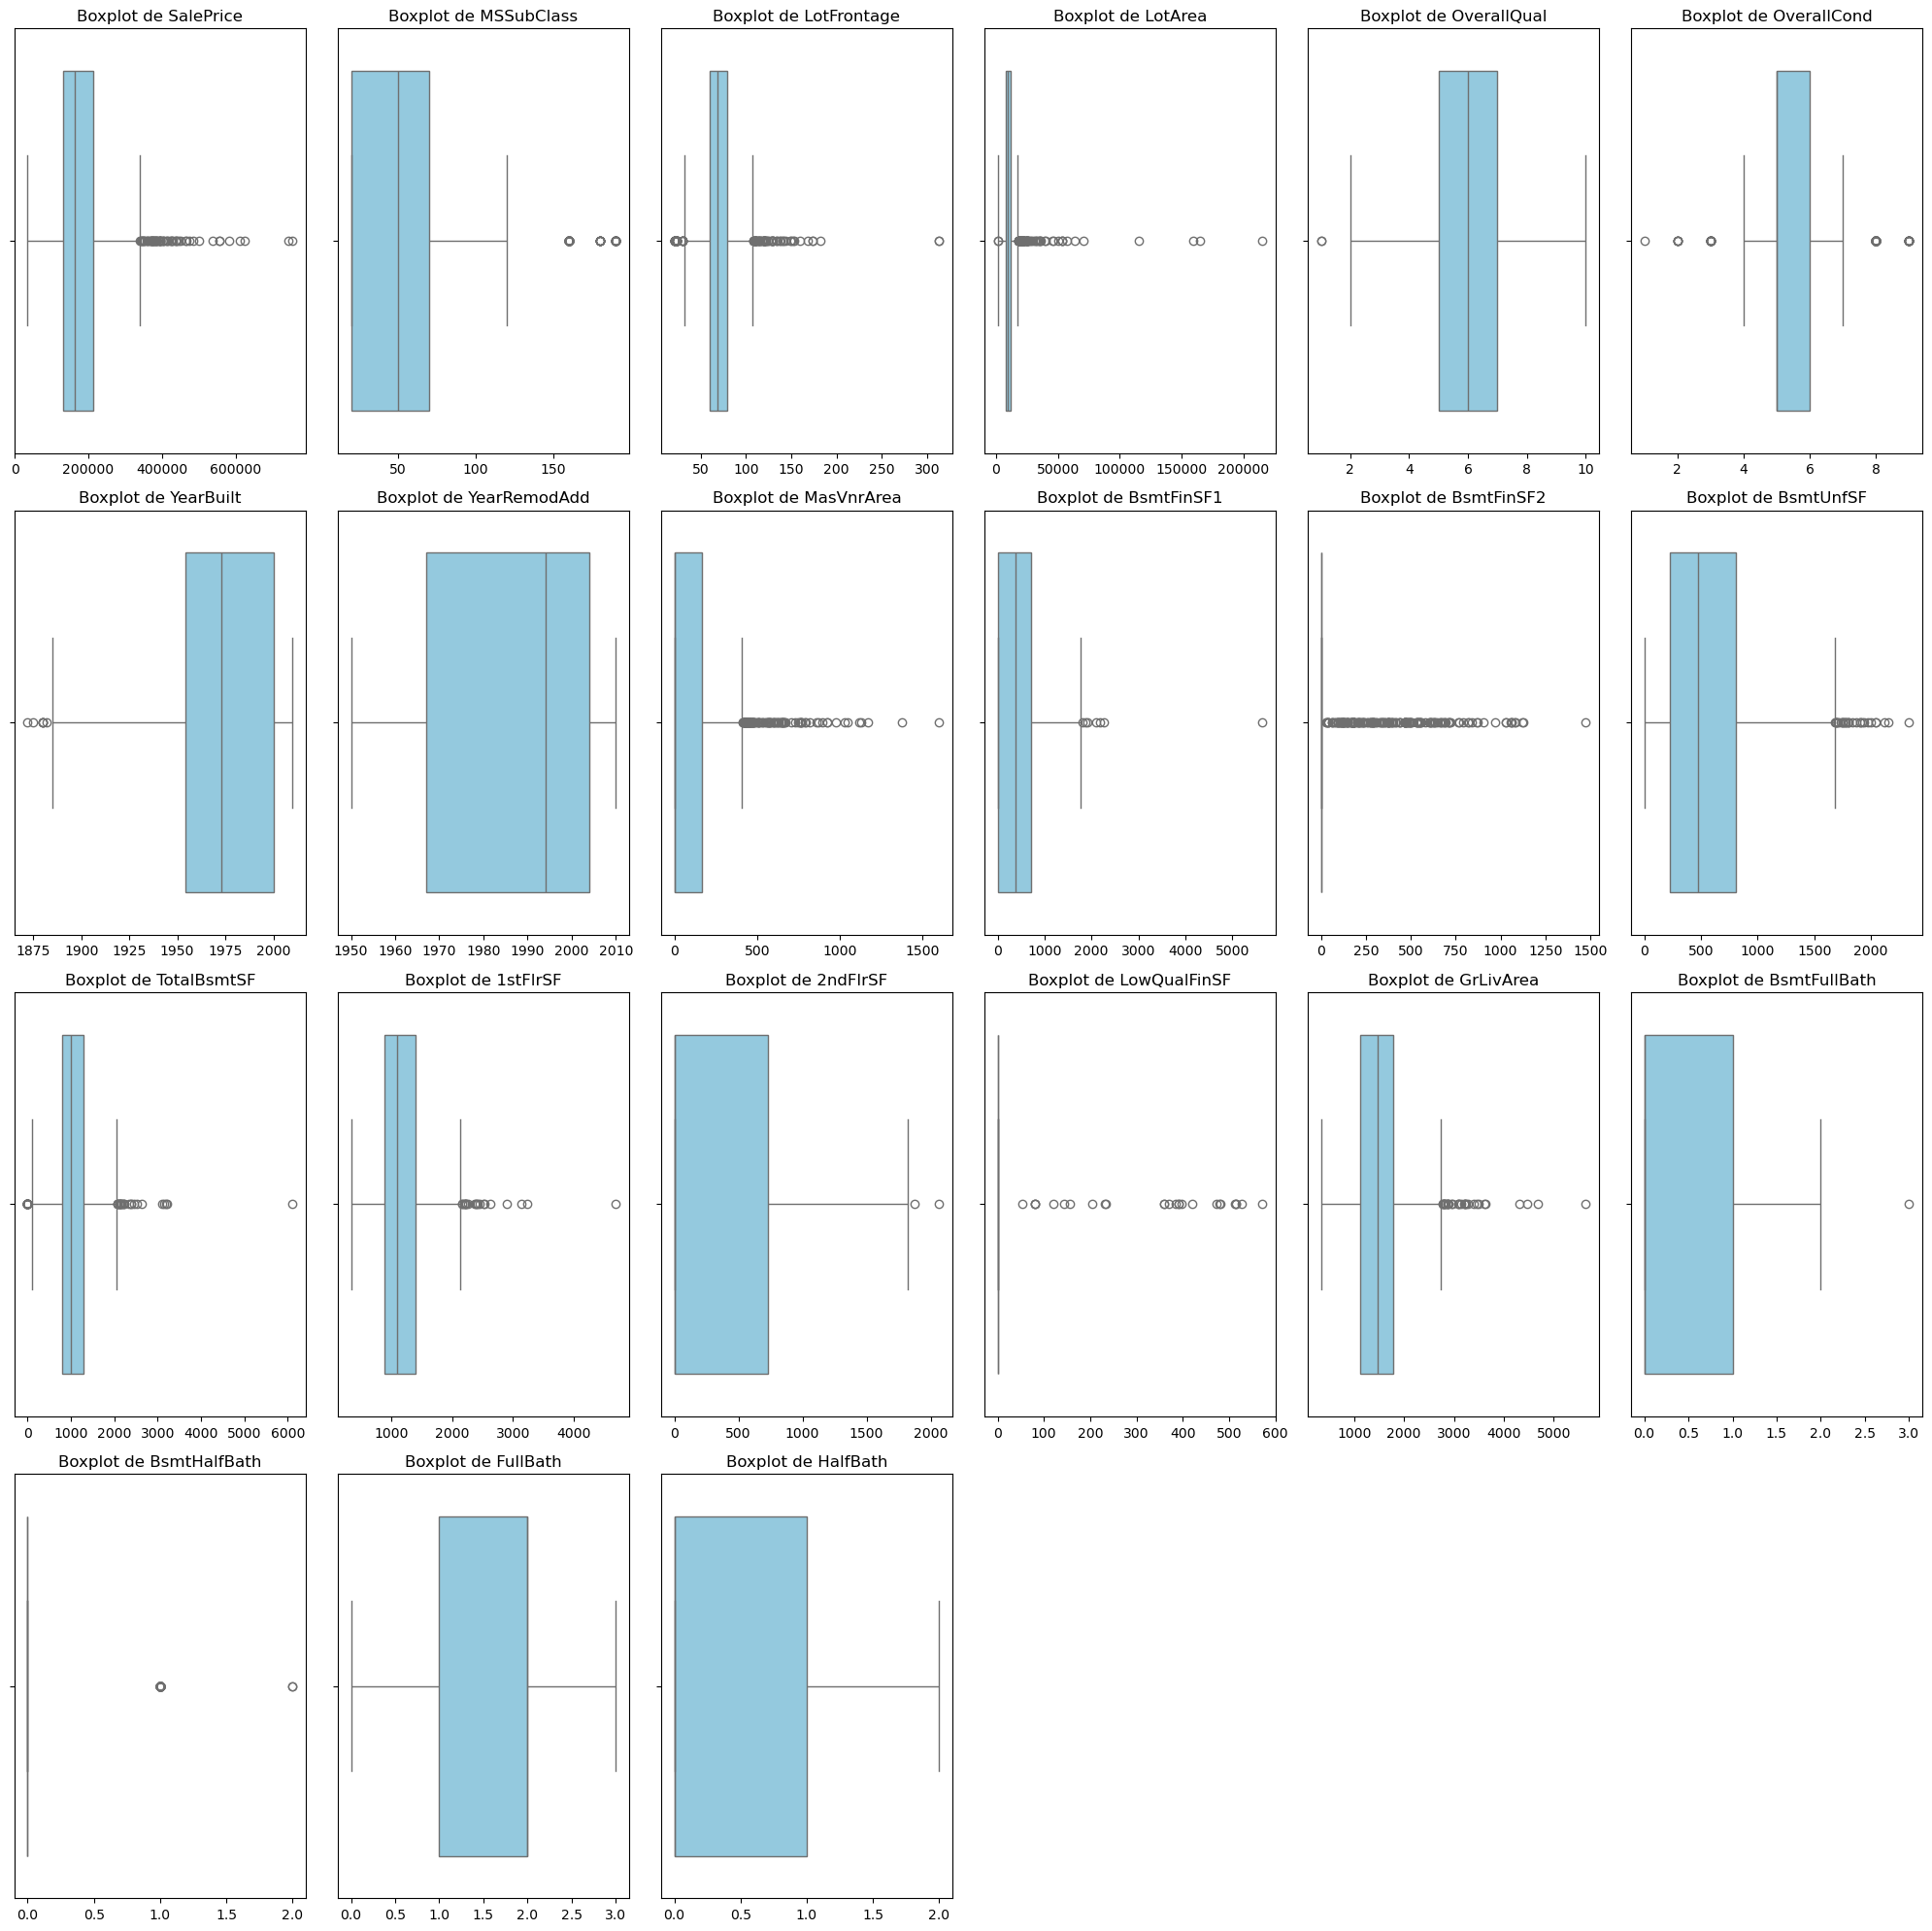

In [122]:
# Sélection des colonnes numériques
colonnes_numeriques = data.select_dtypes(include=[np.number]).columns

# Détermination du nombre de colonnes et de lignes pour les subplots
nombre_colonnes = 6  # Nombre de boxplots par ligne
nombre_lignes = int(np.ceil(len(colonnes_numeriques) / nombre_colonnes))

# Création de la figure et des axes
fig, axes = plt.subplots(nombre_lignes, nombre_colonnes, figsize=(20, 5 * nombre_lignes))
axes = axes.flatten()  # Aplatir le tableau d'axes pour une itération facile

# Création des boxplots pour chaque variable numérique
for i, col in enumerate(colonnes_numeriques):
    sns.boxplot(data=data, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')  # Masquer le label de l'axe x pour plus de clarté

# Suppression des axes inutilisés si le nombre de variables n'est pas un multiple de nombre_colonnes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement entre les subplots
plt.tight_layout()
plt.show()

### Identification des valeurs aberrantes


Pour identifier les valeurs aberrantes dans les colonnes numériques d'un jeu de données, une méthode basée sur l'Intervalle Interquartile (IQR) a été utilisée. Cette approche consiste à calculer les premier et troisième quartiles (Q1 et Q3) pour chaque variable numérique, ainsi que l'IQR, défini comme la différence entre Q3 et Q1. À partir de ces mesures, des limites inférieure (\(Q1 - 1.5 \times IQR\)) et supérieure (\(Q3 + 1.5 \times IQR\)) sont établies pour détecter les observations qui s'écartent significativement de la majorité des données. Toute valeur située en dehors de cet intervalle est considérée comme aberrante. Une matrice booléenne est ensuite générée pour repérer ces valeurs dans chaque colonne, et le nombre total d'observations identifiées comme aberrantes est calculé. Ce processus permet de quantifier les anomalies présentes dans les données et constitue une étape essentielle pour assurer la qualité et la fiabilité des analyses ultérieures.

In [123]:
# Calcul de l'IQR pour chaque colonne numérique
Q1 = data[colonnes_numeriques].quantile(0.25)
Q3 = data[colonnes_numeriques].quantile(0.75)
IQR = Q3 - Q1

# Identification des valeurs aberrantes
valeurs_aberrantes_iqr = ((data[colonnes_numeriques] < (Q1 - 1.5 * IQR)) | (data[colonnes_numeriques] > (Q3 + 1.5 * IQR)))

# Nombre de valeurs aberrantes détectées
nombre_valeurs_aberrantes = valeurs_aberrantes_iqr.sum().sum()
print(f"Nombre de valeurs aberrantes détectées avec IQR: {nombre_valeurs_aberrantes}")


Nombre de valeurs aberrantes détectées avec IQR: 997


In [124]:
# Affichage des résultats pour chaque variable
for col in colonnes_numeriques:
    print(f"Variable: {col}")
    print(f"  Q1: {Q1[col]}")
    print(f"  Q3: {Q3[col]}")
    print(f"  IQR: {IQR[col]}")
    print(f"  Nombre de valeurs aberrantes: {valeurs_aberrantes_iqr[col].sum()}")
    print("-" * 40)


Variable: SalePrice
  Q1: 129975.0
  Q3: 214000.0
  IQR: 84025.0
  Nombre de valeurs aberrantes: 61
----------------------------------------
Variable: MSSubClass
  Q1: 20.0
  Q3: 70.0
  IQR: 50.0
  Nombre de valeurs aberrantes: 103
----------------------------------------
Variable: LotFrontage
  Q1: 60.0
  Q3: 79.0
  IQR: 19.0
  Nombre de valeurs aberrantes: 106
----------------------------------------
Variable: LotArea
  Q1: 7553.5
  Q3: 11601.5
  IQR: 4048.0
  Nombre de valeurs aberrantes: 69
----------------------------------------
Variable: OverallQual
  Q1: 5.0
  Q3: 7.0
  IQR: 2.0
  Nombre de valeurs aberrantes: 2
----------------------------------------
Variable: OverallCond
  Q1: 5.0
  Q3: 6.0
  IQR: 1.0
  Nombre de valeurs aberrantes: 125
----------------------------------------
Variable: YearBuilt
  Q1: 1954.0
  Q3: 2000.0
  IQR: 46.0
  Nombre de valeurs aberrantes: 7
----------------------------------------
Variable: YearRemodAdd
  Q1: 1967.0
  Q3: 2004.0
  IQR: 37.0
  Nombr

In [125]:
# liste des colonnes ayant des valeurs aberrantes
seuil_inf = Q1 - 1.5 * IQR
seuil_sup = Q3 + 1.5 * IQR
colonnes_avec_aberrantes = [
    col for col in colonnes_numeriques
    if (data[col] < seuil_inf[col]).any() or (data[col] > seuil_sup[col]).any()
]
print(colonnes_avec_aberrantes)


['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath']


### Winsorisation

Nous corrigerons les valeurs aberrantes en utilisant la méthode de winsorisation.  

Cette technique consiste à limiter les valeurs extrêmes d’un ensemble de données à des seuils définis, plutôt que de les supprimer. Elle s’applique comme suit :  
- **Seuil supérieur** : Les valeurs dépassant un seuil supérieur, comme le 95e percentile, sont ajustées à ce seuil.  
- **Seuil inférieur** : Les valeurs inférieures à un seuil défini, comme le 5e percentile, sont ajustées à ce seuil.  
- **Ajustement** : Les valeurs trop élevées ou trop basses sont remplacées par les valeurs des seuils correspondants.  

Ainsi, dans notre cas, les valeurs aberrantes seront ajustées pour minimiser leur impact tout en conservant l’intégrité des données.

In [126]:
colonnes_a_winsoriser = ['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath']
for col in colonnes_a_winsoriser:
    data[col] = winsorize(data[col], limits=[0.05, 0.05])


#### Observations des corrections (modifications)

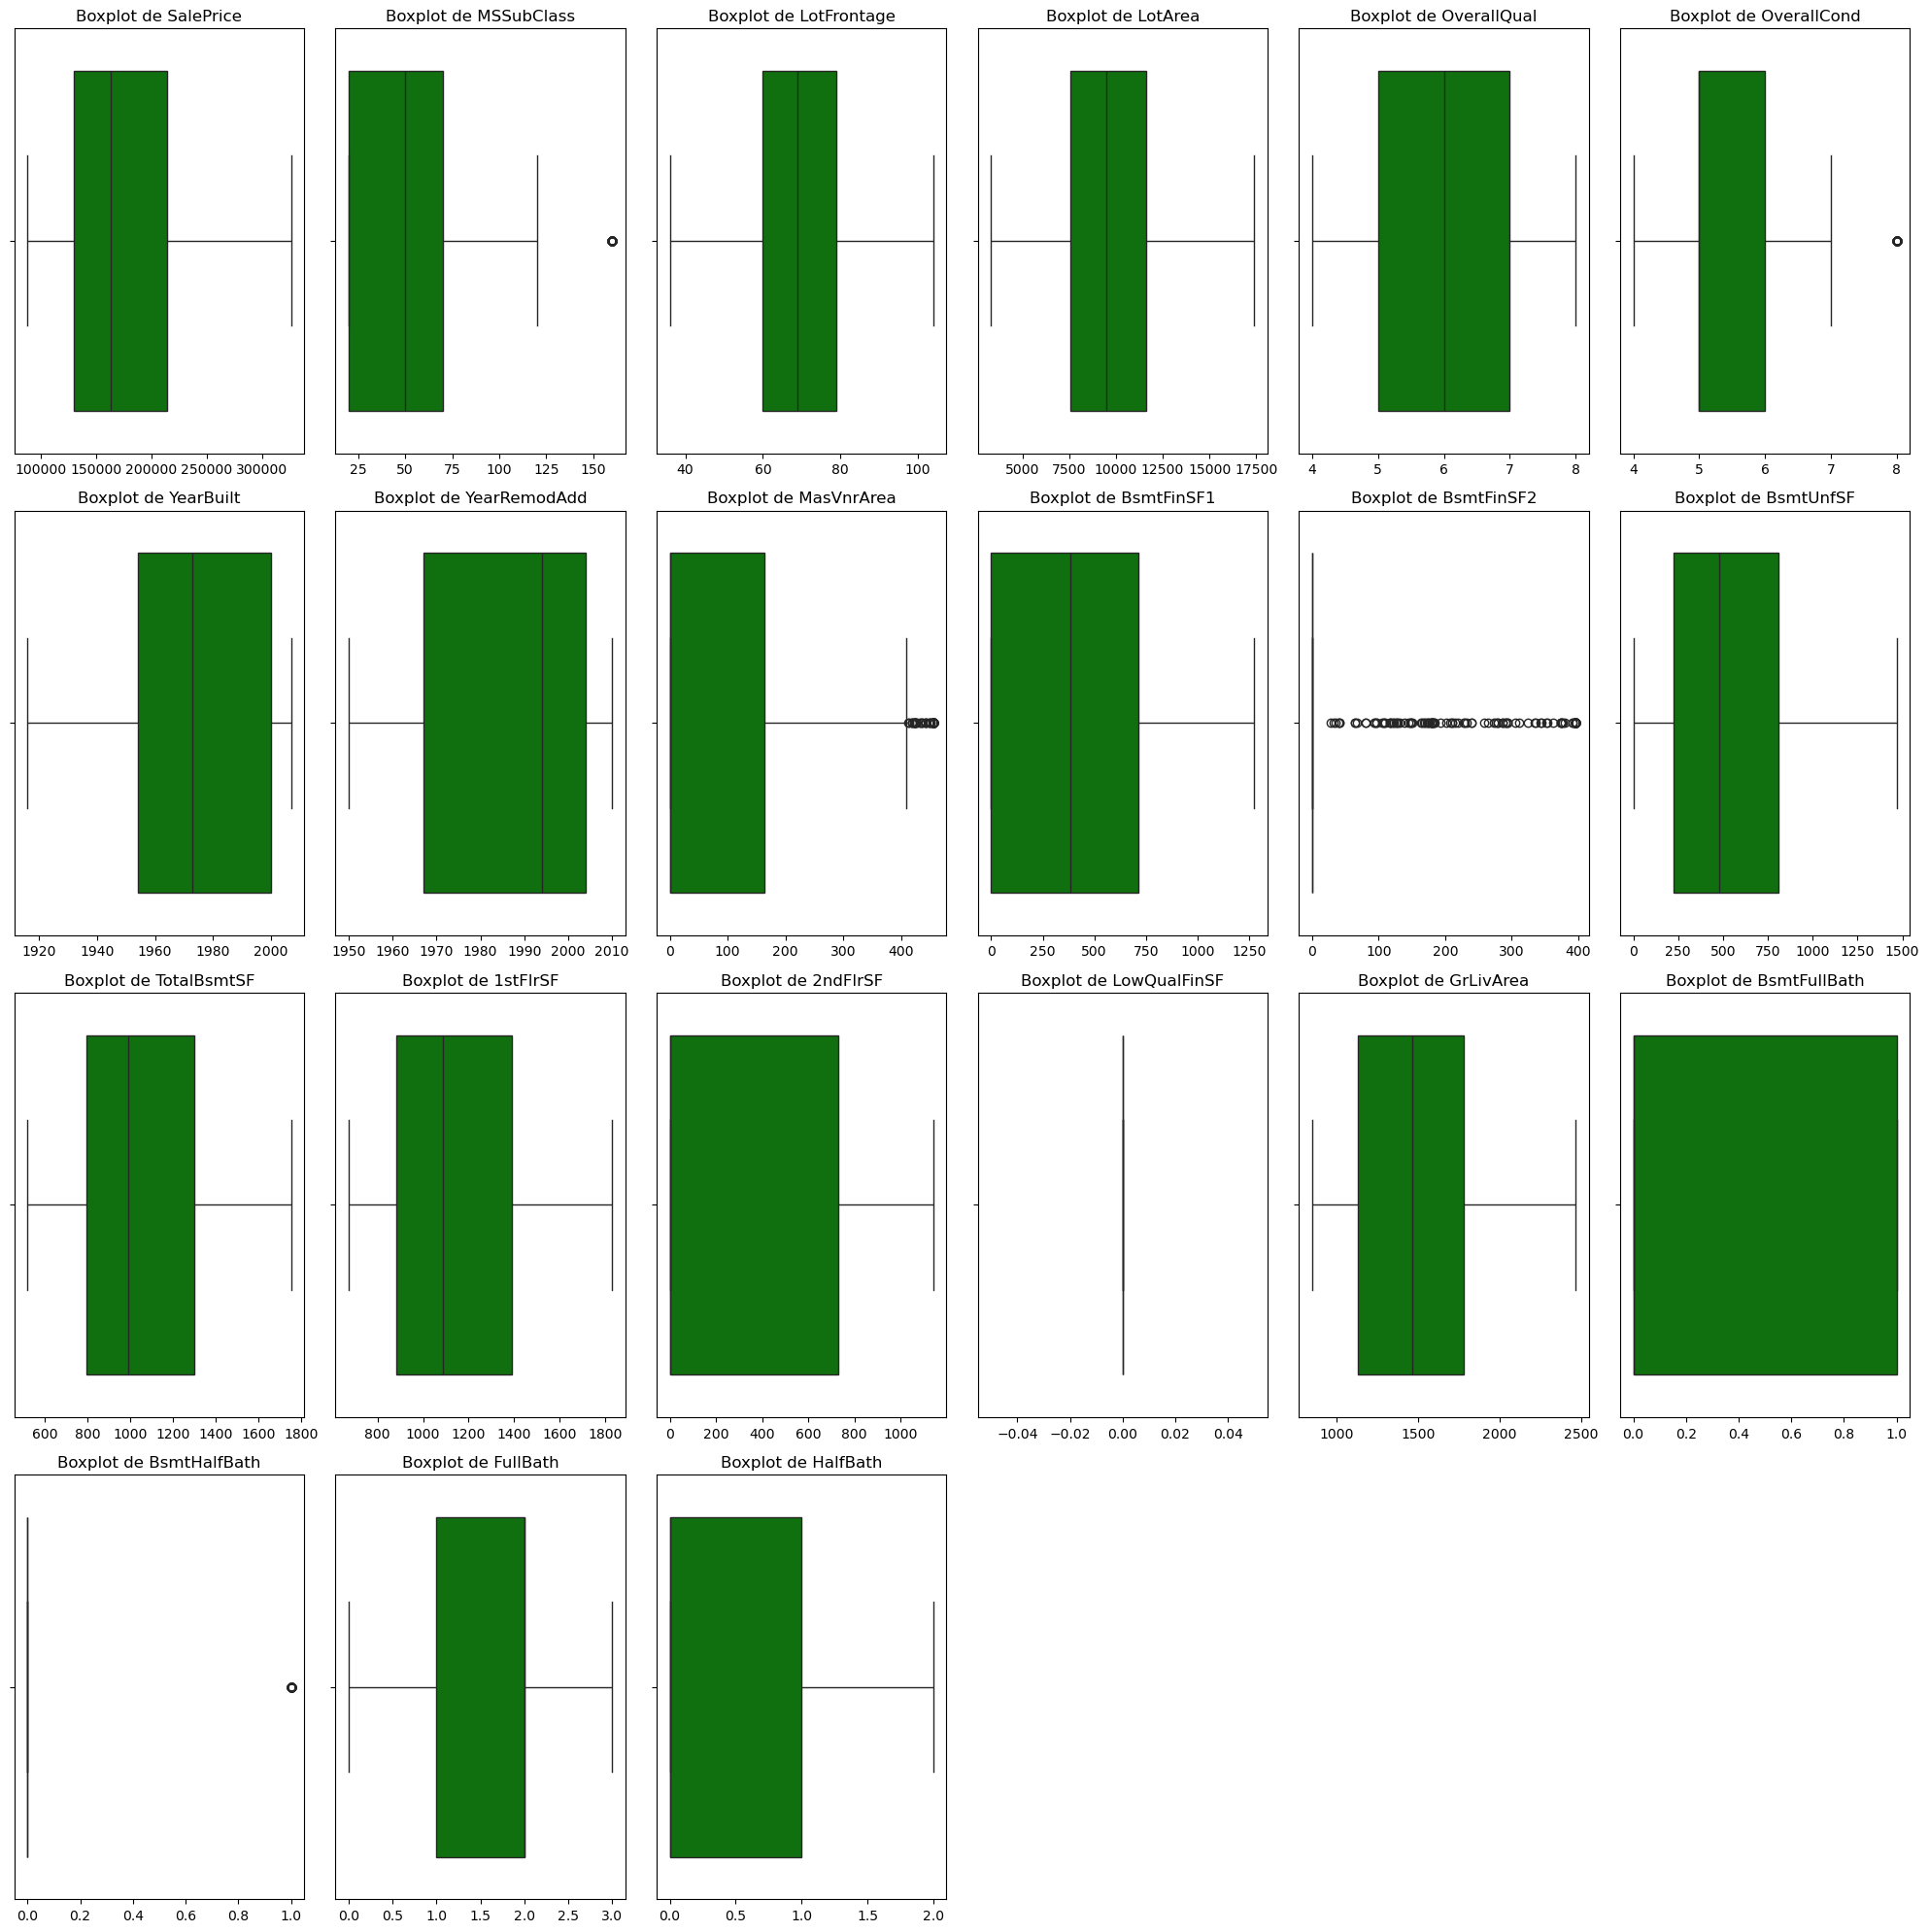

In [127]:
# Sélection des colonnes numériques
colonnes_numeriques = data.select_dtypes(include=[np.number]).columns

# Détermination du nombre de colonnes et de lignes pour les subplots
nombre_colonnes = 6  # Nombre de boxplots par ligne
nombre_lignes = int(np.ceil(len(colonnes_numeriques) / nombre_colonnes))

# Création de la figure et des axes
fig, axes = plt.subplots(nombre_lignes, nombre_colonnes, figsize=(20, 5 * nombre_lignes))
axes = axes.flatten()  # Aplatir le tableau d'axes pour une itération facile

# Création des boxplots pour chaque variable numérique
for i, col in enumerate(colonnes_numeriques):
    sns.boxplot(data=data, x=col, ax=axes[i], color='green')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')  # Masquer le label de l'axe x pour plus de clarté

# Suppression des axes inutilisés si le nombre de variables n'est pas un multiple de nombre_colonnes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement entre les subplots
plt.tight_layout()
plt.show()

### Recodage des variables et labelisation

In [128]:
data['SalePrice'] = np.log1p(data['SalePrice'])

In [129]:
data.dtypes[data.dtypes=='object']

MSZoning        object
Street          object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
Condition2      object
BldgType        object
HouseStyle      object
RoofStyle       object
RoofMatl        object
Exterior1st     object
Exterior2nd     object
ExterQual       object
ExterCond       object
Foundation      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Heating         object
HeatingQC       object
CentralAir      object
Electrical      object
dtype: object

In [130]:
data.dtypes[data.dtypes !='object']

SalePrice       float64
MSSubClass      float64
LotFrontage     float64
LotArea         float64
OverallQual     float64
OverallCond     float64
YearBuilt       float64
YearRemodAdd    float64
MasVnrArea      float64
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
1stFlrSF        float64
2ndFlrSF        float64
LowQualFinSF    float64
GrLivArea       float64
BsmtFullBath    float64
BsmtHalfBath    float64
FullBath        float64
HalfBath        float64
dtype: object

In [131]:
def affiche_label(data):
        #################### Labellisation des variables catégotielles
        # Dictionnaires pour les variables catégorielles
    mapp = {
        "QualityScale": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen/Typique",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "ConditionScale": {
            10: "Très excellent",
            9: "Excellent",
            8: "Très bon",
            7: "Bon",
            6: "Au-dessus de la moyenne",
            5: "Moyenne",
            4: "En dessous de la moyenne",
            3: "Médiocre",
            2: "Mauvais",
            1: "Très mauvais"
        },

        # Dictionnaires spécifiques
        "MSSubClass": {
            20: "1 ÉTAGE 1946 ET PLUS RÉCENT - TOUS STYLES",
            30: "1 ÉTAGE 1945 ET PLUS ANCIEN",
            40: "1 ÉTAGE AVEC GRENIER AMÉNAGÉ - TOUS ÂGES",
            45: "1 ÉTAGE ET DEMI - NON AMÉNAGÉ - TOUS ÂGES",
            50: "1 ÉTAGE ET DEMI - AMÉNAGÉ - TOUS ÂGES",
            60: "2 ÉTAGES 1946 ET PLUS RÉCENT",
            70: "2 ÉTAGES 1945 ET PLUS ANCIEN",
            75: "2 ÉTAGES ET DEMI - TOUS ÂGES",
            80: "NIVEAUX MULTIPLES OU PARTIELS",
            85: "FOYER DIVISÉ",
            90: "DUPLEX - TOUS STYLES ET ÂGES",
            120: "1 ÉTAGE PUD (Lotissement planifié) - 1946 ET PLUS RÉCENT",
            150: "1 ÉTAGE ET DEMI PUD - TOUS ÂGES",
            160: "2 ÉTAGES PUD - 1946 ET PLUS RÉCENT",
            180: "PUD MULTI-NIVEAUX - INCLUT NIVEAUX DIVISÉS",
            190: "CONVERSION 2 FAMILLES - TOUS STYLES ET ÂGES"
        },

        "MSZoning": {
            'A': "Agriculture",
            'C (all)': "Commercial",
            'FV': "Résidentiel flottant",
            'I': "Industriel",
            'RH': "Résidentiel haute densité",
            'RL': "Résidentiel basse densité",
            'RP': "Résidentiel basse densité (parc)",
            'RM': "Résidentiel densité moyenne"
        },

        "Street": {
            'Grvl': "Gravier",
            'Pave': "Pavé"
        },

        "Alley": {
            'Grvl': "Gravier",
            'Pave': "Pavé",
            'No': "Pas d'accès à une allée"
        },

        "LotShape": {
            'Reg': "Régulier",
            'IR1': "Légèrement irrégulier",
            'IR2': "Modérément irrégulier",
            'IR3': "Irrégulier"
        },

        "LandContour": {
            'Lvl': "Plat/Niveau",
            'Bnk': "Bordure - Montée rapide",
            'HLS': "En pente - Forte inclinaison",
            'Low': "Dépression"
        },

        "Utilities": {
            'AllPub': "Tous les services publics (Électricité, Gaz, Eau, Égout)",
            'NoSewr': "Électricité, Gaz, Eau (Fosse septique)",
            'NoSeWa': "Électricité et Gaz uniquement",
            'ELO': "Électricité uniquement"
        },

        "LotConfig": {
            'Inside': "Lot intérieur",
            'Corner': "Lot d'angle",
            'CulDSac': "Cul-de-sac",
            'FR2': "Double façade",
            'FR3': "Triple façade"
        },

        "LandSlope": {
            'Gtl': "Pente douce",
            'Mod': "Pente modérée",
            'Sev': "Pente sévère"
        },

        "Neighborhood": {
            'Blmngtn': "Bloomington Heights",
            'Blueste': "Bluestem",
            'BrDale': "Briardale",
            'BrkSide': "Brookside",
            'ClearCr': "Clear Creek",
            'CollgCr': "College Creek",
            'Crawfor': "Crawford",
            'Edwards': "Edwards",
            'Gilbert': "Gilbert",
            'IDOTRR': "Iowa DOT et chemin de fer",
            'MeadowV': "Meadow Village",
            'Mitchel': "Mitchell",
            'NAmes': "North Ames",
            'NoRidge': "Northridge",
            'NPkVill': "Northpark Villa",
            'NridgHt': "Northridge Heights",
            'NWAmes': "Northwest Ames",
            'OldTown': "Vieille Ville",
            'SWISU': "Sud et Ouest de l'Université d'État de l'Iowa",
            'Sawyer': "Sawyer",
            'SawyerW': "Sawyer Ouest",
            'Somerst': "Somerset",
            'StoneBr': "Stone Brook",
            'Timber': "Timberland",
            'Veenker': "Veenker"
        },

        "Condition1": {
            'Artery': "Proche d'une artère principale",
            'Feedr': "Proche d'une route secondaire",
            'Norm': "Normale",
            'RRNn': "À moins de 200 pieds d'une voie ferrée nord-sud",
            'RRAn': "Adjacente à une voie ferrée nord-sud",
            'PosN': "Proche d'un espace vert ou parc",
            'PosA': "Adjacente à un espace vert ou parc",
            'RRNe': "À moins de 200 pieds d'une voie ferrée est-ouest",
            'RRAe': "Adjacente à une voie ferrée est-ouest"
        },

        "Condition2": {
            'Artery': "Proche d'une artère principale",
            'Feedr': "Proche d'une route secondaire",
            'Norm': "Normale",
            'RRNn': "À moins de 200 pieds d'une voie ferrée nord-sud",
            'RRAn': "Adjacente à une voie ferrée nord-sud",
            'PosN': "Proche d'un espace vert ou parc",
            'PosA': "Adjacente à un espace vert ou parc",
            'RRNe': "À moins de 200 pieds d'une voie ferrée est-ouest",
            'RRAe': "Adjacente à une voie ferrée est-ouest"
        },

        "BldgType": {
            '1Fam': "Maison individuelle",
            '2fmCon': "Conversion deux familles",
            'Duplex': "Duplex",
            'TwnhsE': "Maison de ville (bout)",
            'Twnhs': "Maison de ville (intérieur)"
        },

        "HouseStyle": {
            '1Story': "Un étage",
            '1.5Fin': "Un étage et demi, aménagé",
            '1.5Unf': "Un étage et demi, non aménagé",
            '2Story': "Deux étages",
            '2.5Fin': "Deux étages et demi, aménagé",
            '2.5Unf': "Deux étages et demi, non aménagé",
            'SFoyer': "Foyer divisé",
            'SLvl': "Niveaux divisés"
        },

        "FireplaceQu": {
            'Ex': "Excellent - Cheminée en maçonnerie exceptionnelle",
            'Gd': "Bon - Cheminée en maçonnerie au rez-de-chaussée",
            'TA': "Moyen - Préfabriquée ou en maçonnerie au sous-sol",
            'Fa': "Médiocre - Préfabriquée au sous-sol",
            'Po': "Mauvais - Poêle de type Ben Franklin",
            'No': "Pas de cheminée"
        },

        "Fence": {
            'GdPrv': "Bonne intimité",
            'MnPrv': "Intimité minimale",
            'GdWo': "Bonne qualité en bois",
            'MnWw': "Qualité minimale en bois/fil",
            'No': "Pas de clôture"
        },

        "PoolQC": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "ExterQual": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "ExterCond": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "BsmtQual": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "BsmtCond": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "HeatingQC": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "KitchenQual": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "GarageQual": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "GarageCond": {
            'Ex': "Excellent",
            'Gd': "Bon",
            'TA': "Moyen",
            'Fa': "Médiocre",
            'Po': "Mauvais",
            'No': "Non applicable"
        },

        "OverallQual": {
            10: "Très excellent",
            9: "Excellent",
            8: "Très bon",
            7: "Bon",
            6: "Au-dessus de la moyenne",
            5: "Moyenne",
            4: "En dessous de la moyenne",
            3: "Médiocre",
            2: "Mauvais",
            1: "Très mauvais"
        },

        "OverallCond": {
            10: "Très excellent",
            9: "Excellent",
            8: "Très bon",
            7: "Bon",
            6: "Au-dessus de la moyenne",
            5: "Moyenne",
            4: "En dessous de la moyenne",
            3: "Médiocre",
            2: "Mauvais",
            1: "Très mauvais"
        },
        "RoofStyle": {
            'Gable': "Pignon",
            'Hip': "Pente",
            'Mansard': "Mansardé",
            'Flat': "Plat",
            'Shed': "Abri",
            'Gambrel': 'Gabriel (grange)'
        },

        "RoofMatl": {
            'ClyTile': 'Tuile ou argile',
            'CompShg': 'Bardeau composite standard',
            'Membran': 'Membrane',
            'Metal': 'Métal',
            'Roll': 'Rouleau',
            'Tar&Grv': 'Gravier et bitume',
            'WdShake': 'Bardeau de bois',
            'WdShngl': 'Bardeau en bois'
        },

        "Exterior1st": {
            'AsbShng': 'Bardeaux en amiante',
            'AsphShn': 'Bardeaux en asphalte',
            'BrkComm': 'Brique commune',
            'BrkFace': 'Brique apparente',
            'CBlock': 'Bloc de béton',
            'CemntBd': 'Panneau de ciment',
            'HdBoard': 'Panneau dur',
            'ImStucc': 'Stuc imitation',
            'MetalSd': 'Revêtement métallique',
            'Other': 'Autre',
            'Plywood': 'Contreplaqué',
            'PreCast': 'Préfabriqué',
            'Stone': 'Pierre',
            'Stucco': 'Stuc',
            'VinylSd': 'Revêtement en vinyle',
            'Wd Sdng': 'Revêtement en bois',
            'WdShing': 'Bardeaux en bois'
        },
        "Exterior2nd": {
            'AsbShng': 'Bardeaux en amiante',
            'AsphShn': 'Bardeaux en asphalte',
            'Brk Cmn': 'Brique commune',
            'BrkFace': 'Brique apparente',
            'CBlock': 'Bloc de béton',
            'CmentBd': 'Panneau de ciment',
            'HdBoard': 'Panneau dur',
            'ImStucc': 'Stuc imitation',
            'MetalSd': 'Revêtement métallique',
            'Other': 'Autre',
            'Plywood': 'Contreplaqué',
            'PreCast': 'Préfabriqué',
            'Stone': 'Pierre',
            'Stucco': 'Stuc',
            'VinylSd': 'Revêtement en vinyle',
            'Wd Sdng': 'Revêtement en bois',
            'WdShing': 'Bardeaux en bois'
        },

        "MasVnrType": {
            'BrkFace': "Briques en façade",
            'Stone': "Pierre",
            'No': "Aucune",
            'BrkCmn': "Briques communes"
        },

        "Heating": {
            'GasA': 'Chauffage à gaz',
            'Grav': 'Gravité',
            'Wall': 'Chauffage mural',
            'GasW': 'Chauffage à gaz (chaudière)',
            'Floor': 'Chauffage par le sol',
            'OthW': 'Chauffage à eau chaude ou vapeur (autre que gaz)'
        },

        "Electrical": {
            'SBrkr': 'Disjoncteurs',
            'FuseA': 'Fusibles anciens',
            'FuseF': 'Fusibles',
            'FuseP': 'Fusibles et câblage de mauvaise qualité',
            'Mix': 'Mixte',
            'CircuitBreakers': 'Disjoncteurs modernes',
        },

        "BsmtExposure": {
            'No': "Aucune exposition",
            'Gd': "Bonne exposition",
            'Mn': "Exposition moyenne",
            'Av': "Exposition au niveau moyen"
        },

        "BsmtFinType1": {
            'GLQ': "Fini - Excellent",
            'ALQ': "Fini - Moyenne",
            'BLQ': "Partiellement fini",
            'Unf': "Non fini",
            'Rec': "Fini - Salle de jeux",
            'LwQ': "Fini - Qualité inférieure"
        },

        "GarageType": {
            '2Types': 'Plus d\'un type de garage',
            'Attchd': 'Attaché à la maison',
            'Basment': 'Garage au sous-sol',
            'BuiltIn': 'Garage intégré (fait partie de la maison, souvent avec une pièce au-dessus)',
            'CarPort': 'Abris voiture',
            'Detchd': 'Détaché de la maison',
            'No': 'Pas de garage'
        },
        "GarageFinish": {
            'Fin': "Aménagé",
            'RFn': "Partiellement aménagé",
            'Unf': "Non aménagé",
            'No': "Pas de garage"
        },
        "SaleType": {
            'WD': 'Acte de garantie - Conventionnel',
            'CWD': 'Acte de garantie - Espèces',
            'VWD': 'Acte de garantie - Prêt VA',
            'New': 'Maison neuve construite et vendue',
            'COD': 'Acte de l\'officier judiciaire/Etat',
            'Con': 'Contrat - 15% acompte, conditions normales',
            'ConLw': 'Contrat - Acompte faible et faible taux d\'intérêt',
            'ConLI': 'Contrat - Faible taux d\'intérêt',
            'ConLD': 'Contrat - Acompte faible',
            'Oth': 'Autre'
        },

        "SaleCondition": {
            'Normal': 'Vente normale',
            'Abnorml': 'Vente anormale',
            'AdjLand': 'Achat terrain adjoint',
            'Alloca': 'Allocation (propriétés liées)',
            'Family': 'Vente entre membres de la famille',
            'Partial': 'Maison incomplète'
        },

        "CentralAir": {
            'Y': "Oui",
            'N': "Non"
        },

        "PavedDrive": {
            'Y': "Pavé",
            'P': "Pavement partiel",
            'N': "Gravier/Terre"
        },

        "MoSold": {
            1: "Janvier",
            2: "Février",
            3: "Mars",
            4: "Avril",
            5: "Mai",
            6: "Juin",
            7: "Juillet",
            8: "Août",
            9: "Septembre",
            10: "Octobre",
            11: "Novembre",
            12: "Décembre"
        }

}

    for el in data.columns:
        if el in mapp:  # Vérifier si la colonne est dans le dictionnaire
            data[el] = data[el].map(mapp[el])
        else:
            print(el)

    ####### Renommage des colonnes ########################
    labels = {
        'Id': 'Identifiant',
        'MSSubClass': 'Type de logement',
        'MSZoning': 'Zonage (Classification)',
        'LotFrontage': 'Façade (en pieds)',
        'LotArea': 'Superficie du lot (pieds²)',
        'Street': 'Type de route',
        'Alley': 'Accès à une allée',
        'LotShape': 'Forme du lot',
        'LandContour': 'Topographie du terrain',
        'Utilities': 'Services publics disponibles',
        'LotConfig': 'Configuration du lot',
        'LandSlope': 'Inclinaison du terrain',
        'Neighborhood': 'Quartier',
        'Condition1': 'Proximité (1ère condition)',
        'Condition2': 'Proximité (2e condition)',
        'BldgType': 'Type de bâtiment',
        'HouseStyle': 'Style de maison',
        'OverallQual': 'Qualité globale',
        'OverallCond': 'État général',
        'YearBuilt': 'Année de construction',
        'YearRemodAdd': 'Année de rénovation',
        'RoofStyle': 'Style de toit',
        'RoofMatl': 'Matériau du toit',
        'Exterior1st': 'Revêtement extérieur (1)',
        'Exterior2nd': 'Revêtement extérieur (2)',
        'MasVnrType': 'Type de parement en maçonnerie',
        'MasVnrArea': 'Surface de parement (pieds²)',
        'ExterQual': 'Qualité extérieure',
        'ExterCond': 'État extérieur',
        'Foundation': 'Type de fondation',
        'BsmtQual': 'Qualité du sous-sol',
        'BsmtCond': 'État général du sous-sol',
        'BsmtExposure': 'Exposition du sous-sol',
        'BsmtFinType1': 'Type de finition sous-sol (1)',
        'BsmtFinSF1': 'Surface finie sous-sol',
        'BsmtFinType2': 'Type de finition sous-sol (2)',
        'BsmtFinSF2': 'Surface finie sous-sol 2',
        'BsmtUnfSF': 'Surface non finie sous-sol',
        'TotalBsmtSF': 'Total surface sous-sol',
        'Heating': 'Type de chauffage',
        'HeatingQC': 'Qualité du chauffage',
        'CentralAir': 'Climatisation centrale',
        'Electrical': 'Système électrique',
        '1stFlrSF': 'Surface du premier étage',
        '2ndFlrSF': 'Surface du deuxième étage',
        'LowQualFinSF': 'Surface finie basse qualité (pieds²)',
        'GrLivArea': 'Surface habitable totale',
        'BsmtFullBath': 'Salles de bain complètes sous-sol',
        'BsmtHalfBath': 'Demi-salles de bain sous-sol',
        'FullBath': 'Salles de bain complètes',
        'HalfBath': 'Demi-salles de bain',
        'BedroomAbvGr': 'Chambres (hors sous-sol)',
        'KitchenAbvGr': 'Cuisines (hors sous-sol)',
        'KitchenQual': 'Qualité de la cuisine',
        'TotRmsAbvGrd': 'Total des pièces (hors sous-sol)',
        'Functional': 'Fonctionnalité globale',
        'Fireplaces': 'Nombre de cheminées',
        'FireplaceQu': 'Qualité de la cheminée',
        'GarageType': 'Type de garage',
        'GarageYrBlt': 'Année de construction du garage',
        'GarageFinish': 'Finition intérieure du garage',
        'GarageCars': 'Capacité du garage (voitures)',
        'GarageArea': 'Surface du garage',
        'GarageQual': 'Qualité du garage',
        'GarageCond': 'Condition du garage',
        'PavedDrive': 'Allée pavée',
        'WoodDeckSF': 'Surface du deck en bois',
        'OpenPorchSF': 'Surface du porche ouvert',
        'EnclosedPorch': 'Porche fermé',
        '3SsnPorch': 'Porche trois saisons',
        'ScreenPorch': 'Porche screen',
        'PoolArea': 'Surface de la piscine (pieds²)',
        'PoolQC': 'Qualité de la piscine',
        'Fence': 'Clôture',
        'MiscFeature': 'Caractéristiques supplémentaires',
        'MiscVal': 'Valeur des caractéristiques supplémentaires',
        'MoSold': 'Mois de vente',
        'YrSold': 'Année de vente',
        'SaleType': 'Type de vente',
        'SaleCondition': 'Condition de la vente',
        'SalePrice': 'Prix de vente',
        'houseage': 'Âge de la maison',
        'houseremodelage': 'Rénovation de la maison',
        'totalsf': 'Surface totale (pieds²)',
        'totalarea': 'Surface totale',
        'totalbaths': 'Total des salles de bain',
        'totalporchsf': 'Surface totale des porches (pieds²)'
    }

    for ancien_nom, nouveau_nom in labels.items():
        if ancien_nom in data.columns:
            data = data.rename(columns={ancien_nom: nouveau_nom})

    return data

In [132]:
data.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [133]:
data_to_label=data

In [134]:
data_labelled=affiche_label(data_to_label)

SalePrice
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
Foundation
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath


In [135]:
data_labelled.head()

,Prix de vente,Type de logement,Zonage (Classification),Façade (en pieds),Superficie du lot (pieds²),Type de route,Forme du lot,Topographie du terrain,Services publics disponibles,Configuration du lot,Inclinaison du terrain,Quartier,Proximité (1ère condition),Proximité (2e condition),Type de bâtiment,Style de maison,Qualité globale,État général,Année de construction,Année de rénovation,Style de toit,Matériau du toit,Revêtement extérieur (1),Revêtement extérieur (2),Surface de parement (pieds²),Qualité extérieure,État extérieur,Type de fondation,Qualité du sous-sol,État général du sous-sol,Exposition du sous-sol,Type de finition sous-sol (1),Surface finie sous-sol,Type de finition sous-sol (2),Surface finie sous-sol 2,Surface non finie sous-sol,Total surface sous-sol,Type de chauffage,Qualité du chauffage,Climatisation centrale,Système électrique,Surface du premier étage,Surface du deuxième étage,Surface finie basse qualité (pieds²),Surface habitable totale,Salles de bain complètes sous-sol,Demi-salles de bain sous-sol,Salles de bain complètes,Demi-salles de bain
0,12.247699,2 ÉTAGES 1946 ET PLUS RÉCENT,Résidentiel basse densité,65.0,8450.0,Pavé,Régulier,Plat/Niveau,"Tous les services publics (Électricité, Gaz, Eau, Égout)",Lot intérieur,Pente douce,College Creek,Normale,Normale,Maison individuelle,Deux étages,Bon,Moyenne,2003.0,2003.0,Pignon,Bardeau composite standard,Revêtement en vinyle,Revêtement en vinyle,196.0,Bon,Moyen,PConc,Bon,Moyen,Aucune exposition,Fini - Excellent,706.0,Unf,0.0,150.0,856.0,Chauffage à gaz,Excellent,Oui,Disjoncteurs,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0
1,12.109016,1 ÉTAGE 1946 ET PLUS RÉCENT - TOUS STYLES,Résidentiel basse densité,80.0,9600.0,Pavé,Régulier,Plat/Niveau,"Tous les services publics (Électricité, Gaz, Eau, Égout)",Double façade,Pente douce,Veenker,Proche d'une route secondaire,Normale,Maison individuelle,Un étage,Au-dessus de la moyenne,Très bon,1976.0,1976.0,Pignon,Bardeau composite standard,Revêtement métallique,Revêtement métallique,0.0,Moyen,Moyen,CBlock,Bon,Moyen,Bonne exposition,Fini - Moyenne,978.0,Unf,0.0,284.0,1262.0,Chauffage à gaz,Excellent,Oui,Disjoncteurs,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0
2,12.317171,2 ÉTAGES 1946 ET PLUS RÉCENT,Résidentiel basse densité,68.0,11250.0,Pavé,Légèrement irrégulier,Plat/Niveau,"Tous les services publics (Électricité, Gaz, Eau, Égout)",Lot intérieur,Pente douce,College Creek,Normale,Normale,Maison individuelle,Deux étages,Bon,Moyenne,2001.0,2002.0,Pignon,Bardeau composite standard,Revêtement en vinyle,Revêtement en vinyle,162.0,Bon,Moyen,PConc,Bon,Moyen,Exposition moyenne,Fini - Excellent,486.0,Unf,0.0,434.0,920.0,Chauffage à gaz,Excellent,Oui,Disjoncteurs,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0
3,11.849405,2 ÉTAGES 1945 ET PLUS ANCIEN,Résidentiel basse densité,60.0,9550.0,Pavé,Légèrement irrégulier,Plat/Niveau,"Tous les services publics (Électricité, Gaz, Eau, Égout)",Lot d'angle,Pente douce,Crawford,Normale,Normale,Maison individuelle,Deux étages,Bon,Moyenne,1916.0,1970.0,Pignon,Bardeau composite standard,Revêtement en bois,NaN,0.0,Moyen,Moyen,BrkTil,Moyen,Bon,Aucune exposition,Fini - Moyenne,216.0,Unf,0.0,540.0,756.0,Chauffage à gaz,Bon,Oui,Disjoncteurs,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0
4,12.429220,2 ÉTAGES 1946 ET PLUS RÉCENT,Résidentiel basse densité,84.0,14260.0,Pavé,Légèrement irrégulier,Plat/Niveau,"Tous les services publics (Électricité, Gaz, Eau, Égout)",Double façade,Pente douce,Northridge,Normale,Normale,Maison individuelle,Deux étages,Très bon,Moyenne,2000.0,2000.0,Pignon,Bardeau composite standard,Revêtement en vinyle,Revêtement en vinyle,350.0,Bon,Moyen,PConc,Bon,Moyen,Exposition au niveau moyen,Fini - Excellent,655.0,Unf,0.0,490.0,1145.0,Chauffage à gaz,Excellent,Oui,Disjoncteurs,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0


### Exportation de la base apurée pour la modélisation

In [136]:
data_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Prix de vente                         1460 non-null   float64
 1   Type de logement                      1460 non-null   object 
 2   Zonage (Classification)               1460 non-null   object 
 3   Façade (en pieds)                     1460 non-null   float64
 4   Superficie du lot (pieds²)            1460 non-null   float64
 5   Type de route                         1460 non-null   object 
 6   Forme du lot                          1460 non-null   object 
 7   Topographie du terrain                1460 non-null   object 
 8   Services publics disponibles          1460 non-null   object 
 9   Configuration du lot                  1460 non-null   object 
 10  Inclinaison du terrain                1460 non-null   object 
 11  Quartier         

In [137]:
# Save the DataFrame to a CSV file
data_labelled.to_csv('../data/data_apuree.csv', index=False) # Add this line to save the DataFrame

In [138]:
# À la fin du notebook
end_time = time.time()
duration = end_time - start_time
print(f"Durée totale d'exécution : {duration:.2f} secondes")

Durée totale d'exécution : 50.22 secondes
